## Exploratory Data Analysis (EDA)

### Dataset Description
The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.  


![Image-1](image-1.png)

![Image-2](image-2.png)

![Image-3](image-3.png)

![Image-4](image-4.png)

### Objective 
___Perform Exploratory Data Analysis (EDA) on the data-set while considering Salary as a target variable.___

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

__Importing the data file__

In [2]:
df = pd.read_csv('EDA_Project_Data/data.xlsx - Sheet1.csv')

df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [4]:
df.shape

(3998, 39)

In [5]:
df.describe(include='all')

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998,3.998000e+03,3.998000e+03,3998,3998,3998,3998,3998,3998,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
unique,1,NaN,NaN,81,67,419,339,2,1872,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,train,NaN,NaN,7/1/14 0:00,present,software engineer,Bangalore,m,1/1/91 0:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3998,NaN,NaN,199,1875,539,627,3041,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.637945e+05,3.076998e+05,NaN,NaN,NaN,NaN,NaN,NaN,77.925443,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,NaN,3.632182e+05,2.127375e+05,NaN,NaN,NaN,NaN,NaN,NaN,9.850162,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,NaN,1.124400e+04,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,43.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,NaN,3.342842e+05,1.800000e+05,NaN,NaN,NaN,NaN,NaN,NaN,71.680000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,NaN,6.396000e+05,3.000000e+05,NaN,NaN,NaN,NaN,NaN,NaN,79.150000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,NaN,9.904800e+05,3.700000e+05,NaN,NaN,NaN,NaN,NaN,NaN,85.670000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400


## Data Cleaning

- __Dropping the column 'Unnamed: 0', as that is a garbage column.__
- __Dropping the columns 'ID', 'CollegeCityID', 'CollegeID' as they are not relevant to our analysis.__

In [6]:
df.drop(columns = ['Unnamed: 0', 'ID', 'CollegeID', 'CollegeCityID'], inplace=True)

In [7]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


### Fixing Data types of the Features in accordance with the data documentation

- __[ x ]Change data type of Feature 'DOJ' object -> Datetime__
- __[ x ]Change data type of Feature 'DOL' object -> Datetime__

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3998 non-null   float64
 1   DOJ                    3998 non-null   object 
 2   DOL                    3998 non-null   object 
 3   Designation            3998 non-null   object 
 4   JobCity                3998 non-null   object 
 5   Gender                 3998 non-null   object 
 6   DOB                    3998 non-null   object 
 7   10percentage           3998 non-null   float64
 8   10board                3998 non-null   object 
 9   12graduation           3998 non-null   int64  
 10  12percentage           3998 non-null   float64
 11  12board                3998 non-null   object 
 12  CollegeTier            3998 non-null   int64  
 13  Degree                 3998 non-null   object 
 14  Specialization         3998 non-null   object 
 15  coll

In [9]:
# We don't need the timestamp in the Date of joining column
df['DOJ'] = pd.to_datetime(df['DOJ']).dt.date

In [10]:
# We don't need the timestamp in the Date of leaving column
df['DOL'] = pd.to_datetime(df['DOL']).dt.date

ParserError: Unknown string format: present

### WHAT? 😱

In [11]:
df['DOL'].unique()

array(['present', '3/1/15 0:00', '5/1/15 0:00', '7/1/15 0:00',
       '4/1/15 0:00', '10/1/14 0:00', '9/1/14 0:00', '6/1/14 0:00',
       '9/1/12 0:00', '12/1/13 0:00', '6/1/15 0:00', '10/1/13 0:00',
       '1/1/15 0:00', '4/1/14 0:00', '6/1/13 0:00', '3/1/12 0:00',
       '7/1/14 0:00', '2/1/13 0:00', '1/1/14 0:00', '4/1/13 0:00',
       '7/1/12 0:00', '5/1/14 0:00', '9/1/13 0:00', '2/1/15 0:00',
       '1/1/12 0:00', '8/1/15 0:00', '8/1/14 0:00', '12/1/15 0:00',
       '12/1/14 0:00', '5/1/12 0:00', '3/1/11 0:00', '7/1/11 0:00',
       '2/1/14 0:00', '12/1/11 0:00', '10/1/15 0:00', '11/1/14 0:00',
       '3/1/14 0:00', '11/1/11 0:00', '5/1/13 0:00', '7/1/13 0:00',
       '11/1/13 0:00', '1/1/11 0:00', '5/1/11 0:00', '2/1/12 0:00',
       '11/1/12 0:00', '6/1/12 0:00', '8/1/13 0:00', '3/1/05 0:00',
       '3/1/13 0:00', '10/1/12 0:00', '2/1/11 0:00', '2/1/10 0:00',
       '1/1/13 0:00', '6/1/11 0:00', '9/1/15 0:00', '4/1/12 0:00',
       '8/1/12 0:00', '4/1/11 0:00', '10/1/11 0:00', '

__As the column 'DOL' has value 'present' as one of the data points, we need to replace it with today's date as that employee has not yet left the organization.__

In [12]:
import datetime as dt

df['DOL'] = df['DOL'].replace('present',dt.date.today())

In [13]:
df['DOL'] = pd.to_datetime(df['DOL']).dt.date

In [14]:
# Calculating the number of years the employees have worked so far.

df['Tenure'] = pd.to_datetime(df['DOL']).dt.year - pd.to_datetime(df['DOJ']).dt.year

df['Tenure'].head()

0    12
1    11
2    10
3    13
4     1
Name: Tenure, dtype: int64

#### We actually don't require the date of birth feature but rather the 'Age'

In [15]:
# Calulating age

df['Age'] = 2015 - pd.to_datetime(df['DOB']).dt.year
df['Age'].head()

0    25
1    26
2    23
3    26
4    24
Name: Age, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3998 non-null   float64
 1   DOJ                    3998 non-null   object 
 2   DOL                    3998 non-null   object 
 3   Designation            3998 non-null   object 
 4   JobCity                3998 non-null   object 
 5   Gender                 3998 non-null   object 
 6   DOB                    3998 non-null   object 
 7   10percentage           3998 non-null   float64
 8   10board                3998 non-null   object 
 9   12graduation           3998 non-null   int64  
 10  12percentage           3998 non-null   float64
 11  12board                3998 non-null   object 
 12  CollegeTier            3998 non-null   int64  
 13  Degree                 3998 non-null   object 
 14  Specialization         3998 non-null   object 
 15  coll

__The dataset has__
- 27 Numerical Features
- 8 Categorical Features
- 3 DateTime Features

In [17]:
# Calculating no. of ''-1' and "NaN" values per column.
df.isin([-1,'NaN']).sum()

Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscientiousness           0
agreeableness               0
extraversion                0
nueroticis

In [18]:
# Calculating the percentage of unwanted values in all the columns
df.isin([-1,'NaN']).sum()/len(df)*100

Salary                    0.000000
DOJ                       0.000000
DOL                       0.000000
Designation               0.000000
JobCity                   0.000000
Gender                    0.000000
DOB                       0.000000
10percentage              0.000000
10board                   0.000000
12graduation              0.000000
12percentage              0.000000
12board                   0.000000
CollegeTier               0.000000
Degree                    0.000000
Specialization            0.000000
collegeGPA                0.000000
CollegeCityTier           0.000000
CollegeState              0.000000
GraduationYear            0.000000
English                   0.000000
Logical                   0.000000
Quant                     0.000000
Domain                    6.153077
ComputerProgramming      21.710855
ElectronicsAndSemicon    71.385693
ComputerScience          77.438719
MechanicalEngg           94.122061
ElectricalEngg           95.972986
TelecomEngg         

- _As we can see, in the features, 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', more than 50% of the values are not wanted so we will not be taking these features as a dependent variable in our analysis._

In [19]:
for i in df.columns:
    print("*"*20, i, "*"*20)
    print(df[i].unique())

******************** Salary ********************
[ 420000.  500000.  325000. 1100000.  200000.  300000.  400000.  600000.
  230000.  450000.  270000.  350000.  250000.  120000.  320000.  190000.
  180000.  335000.  435000.  345000.  145000.  220000.  530000.  340000.
  360000.  215000.   80000.  330000.  380000.  110000.  205000.   95000.
  390000.   60000.  240000.  525000.  305000.  150000.  310000.  455000.
  800000.  100000.  280000.  445000.  315000.  370000.  275000. 1500000.
  425000.  470000.  460000.  510000.  480000.  170000.  640000.  225000.
  440000. 1200000.  675000.  105000.  195000.  385000.  235000.  615000.
  290000.  140000.  405000. 1860000.  375000.  430000.  660000.   70000.
  410000.  550000.   35000.  115000.  415000.  265000.  285000.  245000.
  395000.  560000.  700000.  185000.  160000.  625000.   85000.  135000.
  785000.  210000.  155000.  355000.  535000.  690000.  260000. 1110000.
 1000000.  505000.  475000.  715000.  820000.   90000.  720000. 2600000.
  

- ___Feature 'Domain' has an unwanted value '-1'. Lets fix that.___

- Since the feature has continuous numerical values, we can either use mean or use median to impute the value, but that will depend whether there is outlier in the feature or not.
- Let's check the presence of the outlier by making a box plot of the column.

<AxesSubplot:>

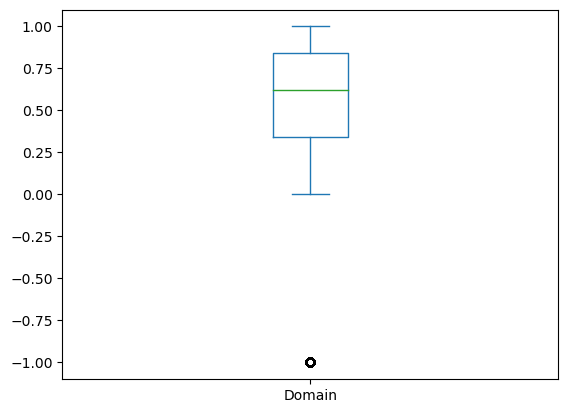

In [20]:
df['Domain'].plot(kind='box')

- As we can see there is outlier present in the column, so its better to use median to impute the value as mean imputation is very sensitive to the presence of the outliers.

In [21]:
df['Domain'].replace(-1, df['Domain'].median(), inplace=True)

- ___Feature 'GraduationYear' has an unwanted value '0'. Let's fix that.___

In [22]:
df['GraduationYear'].value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
0          1
2007       1
Name: GraduationYear, dtype: int64

- _Since there is only one datapoint with that value, we will impute that with the mode of the Feature._

In [23]:
df['GraduationYear'] = df['GraduationYear'].replace(0,df['GraduationYear'].mode()[0])

- ___Features 'CollegeTier' & 'CollegeCityTier' have only two unique values. It's better to convert them to categorical values.___

In [24]:
College_Tier_map = {
    1 : "Tier 1",
    2 : "Tier 2"
}

College_City_Tier_map = {
    0 : "Tier 0",
    1 : "Tier 1"
}
df['CollegeTier'] = df['CollegeTier'].map(College_Tier_map)
df['CollegeCityTier'] = df['CollegeCityTier'].map(College_City_Tier_map)

print(df['CollegeTier'].unique())
print(df['CollegeCityTier'].unique())

['Tier 2' 'Tier 1']
['Tier 0' 'Tier 1']


In [25]:
numerical_features = ['Salary', '10percentage', '12graduation', '12percentage',
        'collegeGPA', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming','conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Tenure', 'Age']

categorical_features = ['Designation', 'JobCity', 'Gender', '10board', '12board', 'Degree', 'Specialization', 'CollegeState', 'CollegeTier', 'CollegeCityTier' ]

# Univariate Analysis

## Categorical Non-Visual Analysis

- __Feature 'CollegeTier'__

In [26]:
print('No. of unique values in  the feature is : ', df['CollegeTier'].nunique())
print('*'*40)
print('List of Unique values in the Feature : ', df['CollegeTier'].unique())
print('*'*40)
print('Total no. of datapoints in the Feature are : ', df['CollegeTier'].count())
print('*'*40)
print('No. of records for Designation are : \n', df['CollegeTier'].value_counts())
print('*'*40)
print('Most frequent value of the Feature is : ', df['CollegeTier'].mode())

No. of unique values in  the feature is :  2
****************************************
List of Unique values in the Feature :  ['Tier 2' 'Tier 1']
****************************************
Total no. of datapoints in the Feature are :  3998
****************************************
No. of records for Designation are : 
 Tier 2    3701
Tier 1     297
Name: CollegeTier, dtype: int64
****************************************
Most frequent value of the Feature is :  0    Tier 2
Name: CollegeTier, dtype: object


- __Feature 'CollegeCityTier'__

In [27]:
print('No. of unique values in  the feature is : ', df['CollegeCityTier'].nunique())
print('*'*40)
print('List of Unique values in the Feature : ', df['CollegeCityTier'].unique())
print('*'*40)
print('Total no. of datapoints in the Feature are : ', df['CollegeCityTier'].count())
print('*'*40)
print('No. of records for Designation are : \n', df['CollegeCityTier'].value_counts())
print('*'*40)
print('Most frequent value of the Feature is : ', df['CollegeCityTier'].mode())

No. of unique values in  the feature is :  2
****************************************
List of Unique values in the Feature :  ['Tier 0' 'Tier 1']
****************************************
Total no. of datapoints in the Feature are :  3998
****************************************
No. of records for Designation are : 
 Tier 0    2797
Tier 1    1201
Name: CollegeCityTier, dtype: int64
****************************************
Most frequent value of the Feature is :  0    Tier 0
Name: CollegeCityTier, dtype: object


- __Feature 'Designation'__

In [28]:
print('No. of unique values in  the feature is : ', df['Designation'].nunique())
print('*'*40)
print('List of Unique values in the Feature : ', df['Designation'].unique())
print('*'*40)
print('Total no. of datapoints in the Feature are : ', df['Designation'].count())
print('*'*40)
print('No. of records for Designation are : \n', df['Designation'].value_counts())
print('*'*40)
print('Most frequent value of the Feature is : ', df['Designation'].mode())

No. of unique values in  the feature is :  419
****************************************
List of Unique values in the Feature :  ['senior quality engineer' 'assistant manager' 'systems engineer'
 'senior software engineer' 'get' 'system engineer'
 'java software engineer' 'mechanical engineer' 'electrical engineer'
 'project engineer' 'senior php developer' 'senior systems engineer'
 'quality assurance engineer' 'qa analyst' 'network engineer'
 'product development engineer' 'associate software developer'
 'data entry operator' 'software engineer' 'developer'
 'electrical project engineer' 'programmer analyst' 'systems analyst'
 'ase' 'telecommunication engineer' 'application developer'
 'ios developer' 'executive assistant' 'online marketing manager'
 'documentation specialist' 'associate software engineer'
 'management trainee' 'site manager' 'software developer' '.net developer'
 'production engineer' 'jr. software engineer'
 'trainee software developer' 'ui developer' 'assistant sys

In [29]:
df.loc[df['Designation']=='get']['Designation'].value_counts()

get    14
Name: Designation, dtype: int64

- ***We have 'get' as one of the values which is an undesirable value.***

In [30]:
df['Designation'] = df['Designation'].replace('get','unknown')

In [31]:
# Assuming that people with same specialization have similar designations.
df[df["Designation"]=="unknown"][['Designation','Specialization']]

,Designation,Specialization
4,unknown,electronics and communication engineering
332,unknown,mechanical and automation
350,unknown,electrical engineering
1717,unknown,mechanical engineering
1897,unknown,mechanical engineering
2140,unknown,mechanical engineering
2318,unknown,electronics and electrical engineering
2443,unknown,mechanical engineering
2666,unknown,electronics and electrical engineering
2757,unknown,mechanical engineering


- __Most students whose designation is unknown are from 'mechanical engineering' specialization.__
- __So replacing those students' designation with the designation possessed by most mechanical engineering students will be a good choice.__
- __Will repeat the same procedure for the students having 'electronics and electrical engineering' as their specialization.__

In [32]:
mechanical_mode = df[df['Specialization'].isin(['mechanical engineering','mechanical and automation'])]['Designation'].mode()[0]

electrical_mode = df[df['Specialization']==('electronics and electrical engineering')]['Designation'].mode()[0]
print('mode for mechanical engineering specialization:',  mechanical_mode)
print('mode for electronics and electrical engineering specialization:',  electrical_mode)

mode for mechanical engineering specialization: production engineer
mode for electronics and electrical engineering specialization: system engineer


In [33]:
#For mechanical engineering specialization
df.loc[df['Specialization'].isin(['mechanical engineering','mechanical and automation']),'Designation'].replace('unknown',mechanical_mode,inplace=True)
#for electronics and electrical engineering specialization
df['Designation'].replace('unknown',electrical_mode,inplace=True)

- __Feature 'JobCity'__
    - _Correcting the spelling of the cities mentioned in the Feature_

In [34]:
df['JobCity'] = df['JobCity'].str.strip()

In [35]:
df['JobCity'].replace('Bangalore','Bengaluru', inplace = True)
df['JobCity'].replace('Banglore','Bengaluru', inplace = True)
df['JobCity'].replace('Banagalore','Bengaluru', inplace = True)
df['JobCity'].replace('Banaglore','Bengaluru', inplace = True)
df['JobCity'].replace('Asifabadbanglore','Bengaluru', inplace = True)
df['JobCity'].replace('Punr','Pune', inplace = True)
df['JobCity'].replace('New Dehli', 'New Delhi', inplace = True)
df['JobCity'].replace('Delhi/Ncr', 'Delhi', inplace = True)
df['JobCity'].replace('Ncr', 'Delhi', inplace = True)
df['JobCity'].replace('Guragaon', 'Gurugram', inplace = True)
df['JobCity'].replace('Gurgaon', 'Gurugram', inplace = True)
df['JobCity'].replace('Gurgoan', 'Gurugram', inplace = True)
df['JobCity'].replace('Hyderabad(Bhadurpally)', 'Hyderabad', inplace = True)
df['JobCity'].replace('Hderabad', 'Hyderabad', inplace = True)
df['JobCity'].replace('Bhubneshwar','Bhubaneswar', inplace = True)
df['JobCity'].replace('Bhubaneshwar','Bhubaneswar', inplace = True)
df['JobCity'].replace('Kolkata`', 'Kolkata', inplace = True)
df['JobCity'].replace('Kochi', 'Kochi/Cochin', inplace = True)
df['JobCity'].replace('Technopark, Trivandrum', 'Trivandrum', inplace = True)
df['JobCity'].replace('Thiruvananthapuram', 'Trivandrum', inplace = True)
df['JobCity'].replace('Tirupathi', 'Tirupati', inplace = True)
df['JobCity'].replace('Nasikcity', 'Nasik', inplace = True)
df['JobCity'].replace('Nashik', 'Nasik', inplace = True)
df['JobCity'].replace('Ambala City', 'Ambala', inplace = True)
df['JobCity'].replace('A-64,Sec-64,Noida', 'Noida', inplace = True)
df['JobCity'].replace('Latur (Maharashtra )', 'Latur', inplace = True)
df['JobCity'].replace('Gajiabaad', 'Ghaziabad', inplace = True)
df['JobCity'].replace('Gaziabaad', 'Ghaziabad', inplace = True)
df['JobCity'].replace('Visakhapatnam', 'Vizag', inplace = True)
df['JobCity'].replace('Vsakhapttnam', 'Vizag', inplace = True)
df['JobCity'].replace('Pondi', 'Pondicherry', inplace = True)
df['JobCity'].replace('Pondy', 'Pondicherry', inplace = True)
df['JobCity'].replace('Sonepat', 'Sonipat', inplace = True)

In [36]:
print('No. of unique values in  the feature is : ', df['JobCity'].nunique())
print('*'*40)
print('List of Unique values in the Feature : ', df['JobCity'].unique())
print('*'*40)
print('Total no. of datapoints in the Feature are : ', df['JobCity'].count())
print('*'*40)
print('No. of records for JobCity are : \n', df['JobCity'].value_counts())
print('*'*40)
print('Most frequent value of the Feature is : ', df['JobCity'].mode())

No. of unique values in  the feature is :  283
****************************************
List of Unique values in the Feature :  ['Bengaluru' 'Indore' 'Chennai' 'Gurugram' 'Manesar' 'Hyderabad' 'Noida'
 'Kolkata' 'Pune' '-1' 'mohali' 'Jhansi' 'Delhi' 'noida' 'delhi'
 'Bhubaneswar' 'Navi Mumbai' 'Mumbai' 'New Delhi' 'Mangalore' 'Rewari'
 'Ghaziabad' 'Bhiwadi' 'Mysore' 'Rajkot' 'Greater Noida' 'Jaipur'
 'HYDERABAD' 'mysore' 'THANE' 'Maharajganj' 'Trivandrum' 'Punchkula'
 'coimbatore' 'Dhanbad' 'Lucknow' 'kolkata' 'mumbai' 'Gandhi Nagar' 'Una'
 'Daman and Diu' 'chennai' 'GURGOAN' 'vsakhapttnam' 'pune' 'Nagpur'
 'Bhagalpur' 'new delhi - jaisalmer' 'Coimbatore' 'Ahmedabad'
 'Kochi/Cochin' 'Bankura' 'Kanpur' 'jaipur' 'bangalore' 'CHENNAI'
 'Vijayawada' 'Beawar' 'Alwar' 'NOIDA' 'Greater noida' 'Siliguri' 'raipur'
 'gurgaon' 'Bhopal' 'Faridabad' 'Jodhpur' 'udaipur' 'Muzaffarpur'
 'Bulandshahar' 'Haridwar' 'Raigarh' 'Vizag' 'Jabalpur' 'hyderabad'
 'Unnao' 'KOLKATA' 'Thane' 'Aurangabad' 'Belgaum'

- ***As we can see, we have one value as '-1'. Treating this as missing value.***
- ***Since this 'JobCity' is a categorical Feature, we can impute this value with mode of the Feature.***
- But the question is, What mode to choose? as the no. of unknown values in the Feature are quite high (461).
    - To tackle the problem, we will use the concept of best mode.
    - First, we will find the modes of all columns where 'JobCity' = '-1'.
    - Then, using those modes we will locate their corresponding values in the 'JobCity' column.
    - Lastly, we will put all those values in a list and choose the best mode from that.
   

In [37]:
df['JobCity'].replace('-1','Unknown', inplace = True)
df['JobCity'] = df['JobCity'].apply(lambda x : x.title())

In [38]:
df[df["JobCity"]=="Unknown"][categorical_features].mode()

,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState,CollegeTier,CollegeCityTier
0,software engineer,Unknown,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh,Tier 2,Tier 0


In [39]:
best_mode_list = []
best_mode_list.append(df[df["Designation"]=="software engineer"]["JobCity"].mode().to_list()[0])
best_mode_list.append(df[df["Gender"]=="m"]["JobCity"].mode().to_list()[0])
best_mode_list.append(df[df["10board"]=="cbse"]["JobCity"].mode().to_list()[0])
best_mode_list.append(df[df["12board"]=="cbse"]["JobCity"].mode().to_list()[0])
best_mode_list.append(df[df["Degree"].str.startswith("B.Tech/")]["JobCity"].mode().to_list()[0])
best_mode_list.append(df[df["Specialization"].str.startswith("electronics and communication engineering")]["JobCity"].mode().to_list()[0])
best_mode_list.append(df[df["CollegeState"].str.startswith("Uttar Pradesh")]["JobCity"].mode().to_list()[0])
best_mode_list

['Bengaluru', 'Bengaluru', 'Noida', 'Noida', 'Bengaluru', 'Bengaluru', 'Noida']

- From the above list, we can see the best mode is 'Bengaluru'. So we will use that.

In [40]:
df['JobCity'].replace('Unknown','Bengaluru', inplace = True)

 - __Feature 'Gender'__

In [41]:
df['Gender'].replace('m', 'Male', inplace=True)
df['Gender'].replace('f', 'Female', inplace=True)

In [42]:
print('No. of unique values in  the feature is : ', df['Gender'].nunique())
print('*'*40)
print('List of Unique values in the Feature : ', df['Gender'].unique())
print('*'*40)
print('Total no. of datapoints in the Feature are : ', df['Gender'].count())
print('*'*40)
print('No. of records for Gender are : \n', df['Gender'].value_counts())
print('*'*40)
print('Most frequent value of the Feature is : ', df['Gender'].mode())

No. of unique values in  the feature is :  2
****************************************
List of Unique values in the Feature :  ['Female' 'Male']
****************************************
Total no. of datapoints in the Feature are :  3998
****************************************
No. of records for Gender are : 
 Male      3041
Female     957
Name: Gender, dtype: int64
****************************************
Most frequent value of the Feature is :  0    Male
Name: Gender, dtype: object


- __Feature '10board'__

In [43]:
print('No. of unique values in  the feature is : ', df['10board'].nunique())
print('*'*40)
print('List of Unique values in the Feature : ', df['10board'].unique())
print('*'*40)
print('Total no. of datapoints in the Feature are : ', df['10board'].count())
print('*'*40)
print('No. of records for 10board are : \n', df['10board'].value_counts())
print('*'*40)
print('Most frequent value of the Feature is : ', df['10board'].mode()) 

No. of unique values in  the feature is :  275
****************************************
List of Unique values in the Feature :  ['board ofsecondary education,ap' 'cbse' 'state board' 'mp board bhopal'
 'icse' 'karnataka secondary school of examination' 'up'
 'karnataka state education examination board' 'ssc'
 'kerala state technical education' '0' 'bseb'
 'state board of secondary education, andhra pradesh' 'matriculation'
 'gujarat state board' 'karnataka state board' 'wbbse'
 'maharashtra state board' 'icse board' 'up board'
 'board of secondary education(bse) orissa'
 'little jacky matric higher secondary school' 'uttar pradesh board'
 'bsc,orissa' 'mp board' 'upboard' 'matriculation board' 'j & k bord'
 'rbse' 'central board of secondary education' 'pseb' 'jkbose'
 'haryana board of school education,(hbse)' 'metric' 'ms board' 'kseeb'
 'stateboard' 'maticulation' 'karnataka secondory education board'
 'mumbai board' 'sslc' 'kseb' 'board secondary  education' 'matric board'
 'board

In [44]:
# compiling all values to 3 categories : CBSE, ICSE and State.
# This will make visual analysis much better.
state_board_list = ['board ofsecondary education,ap','state board','mp board bhopal',
 'karnataka secondary school of examination','up',
 'karnataka state education examination board','ssc',
 'kerala state technical education','bseb',
 'state board of secondary education, andhra pradesh', 'matriculation',
 'gujarat state board', 'karnataka state board', 'wbbse',
 'maharashtra state board', 'up board',
 'board of secondary education(bse) orissa',
 'little jacky matric higher secondary school', 'uttar pradesh board',
 'bsc,orissa', 'mp board', 'upboard', 'matriculation board', 'j & k bord', 
 'rbse', 'pseb', 'jkbose',
 'haryana board of school education,(hbse)', 'metric', 'ms board', 'kseeb',
 'stateboard', 'maticulation', 'karnataka secondory education board',
 'mumbai board', 'sslc', 'kseb', 'board secondary  education', 'matric board',
 'board of secondary education', 'west bengal board of secondary education',
 'jharkhand secondary examination board,ranchi', 'u p board', 'bseb,patna',
 'hsc', 'bse', 'sss pune', 'karnataka education board (keeb)', 'kerala',
 'state board of secondary education( ssc)', 'gsheb', 'up(allahabad)',
 'nagpur', 'don bosco maatriculation school',
 'karnataka state secondary education board', 'maharashtra',
 'karnataka secondary education board', 
 'himachal pradesh board of school education',
 'certificate of middle years program of ib',
 'karnataka board of secondary education',
 'board of secondary education rajasthan', 'uttarakhand board', 'ua',
 'board of secendary education orissa',
 'karantaka secondary education and examination borad', 'hbsc',
 'kseeb(karnataka secondary education examination board)',
 'hbse', 'state(karnataka board)',
 'jharkhand accademic council',
 'jharkhand secondary examination board (ranchi)',
 'karnataka secondary education examination board', 'delhi board',
 'mirza ahmed ali baig', 'jseb', 'bse, odisha', 'bihar board',
 'maharashtra state(latur board)', 'rajasthan board', 'mpboard', 'upbhsie',
 'secondary board of rajasthan', 'tamilnadu matriculation board',
 'jharkhand secondary board',
 'board of secondary education,andhara pradesh', 'up baord', 'state',
 'board of intermediate education',
 'state board of secondary education,andhra pradesh',
 'up board , allahabad', 'stjosephs girls higher sec school,dindigul',
 'maharashtra board', 'education board of kerala', 'board of ssc',
 'maharashtra state board pune', 'board of school education harayana',
 'secondary school cerfificate', 'maharashtra sate board', 'ksseb',
 'bihar examination board, patna', 'latur',
 'board of secondary education, rajasthan', 'state borad hp', 'cluny',
 'bsepatna', 'up borad', 'ssc board of andrapradesh', 'matric', 'bse,orissa',
 'ssc-andhra pradesh', 'mp', 'karnataka education board', 'mhsbse',
 'karnataka sslc board bangalore', 'karnataka', 'u p',
 'secondary school of education', 'state board of karnataka',
 'karnataka secondary board', 'andhra pradesh board ssc',
 'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
 'hse,orissa', 'national public school', 'nagpur board',
 'jharkhand academic council', 'bsemp',
 'board of secondary education, andhra pradesh',
 'board of secondary education orissa',
 'board of secondary education,rajasthan(rbse)',
 'board of secondary education,ap',
 'board of secondary education,andhra pradesh',
 'jawahar navodaya vidyalaya', 'aisse',
 'karnataka board of higher education', 'bihar', 'kerala state board',
 'cicse', 'tn state board', 'kolhapur divisional board, maharashtra',
 'bharathi matriculation school', 'uttaranchal state board', 'wbbsce',
 'mp state board', 'seba(assam)', 'anglo indian', 'gseb', 'uttar pradesh',
 'ghseb', 'board of school education uttarakhand', 'msbshse,pune',
 'tamilnadu state board', 'kerala university',
 'uttaranchal shiksha avam pariksha parishad',
 'bse(board of secondary education)', 'bright way college, (up board)',
 'school secondary education, andhra pradesh',
 'secondary state certificate',
 'maharashtra state board of secondary and higher secondary education,pune',
 'andhra pradesh state board', 'stmary higher secondary', 'cgbse',
 'secondary school certificate', 'rajasthan board ajmer', 'mpbse',
 'pune board', 'board of secondary education,orissa',
 'maharashtra state board,pune', 'up bord',
 'kiran english medium high school', 'state board (jac, ranchi)',
 'gujarat board', 'state board ', 'sarada high scchool',
 'kalaimagal matriculation higher secondary school', 'karnataka board',
 'maharastra board', 'sslc board', 'ssc maharashtra board',
 'tamil nadu state', 'uttrakhand board',
 'bihar secondary education board,patna',
 'haryana board of school education',
 'sri kannika parameswari highier secondary school, udumalpet',
 'ksseb(karnataka state board)', 'nashik board',
 'jharkhand secondary education board', 'himachal pradesh board',
 'maharashtra satate board',
 'maharashtra state board mumbai divisional board',
 'dav public school,hehal', 'state board of secondary education, ap',
 'rajasthan board of secondary education', 'hsce',
 'karnataka secondary education', 'board of secondary education,odisha',
 'maharashtra nasik board',
 'west bengal board of secondary examination (wbbse)',
 'holy cross matriculation hr sec school', 'apssc', 'bseb patna',
 'kolhapur', 'bseb, patna', 'up board allahabad', 'biharboard',
 'nagpur board,nagpur', 'pune', 'gyan bharati school', 'rbse,ajmer',
 'board of secondaray education', 'secondary school education', 'state bord',
 'jbse,jharkhand', 'hse', 'madhya pradesh board',
 'bihar school examination board',
 'west bengal board of secondary eucation', 'state boardmp board ',
  'board of secondary education (bse) orissa',
 'maharashtra state board for ssc', 'board of secondary school education',
 'latur board', "stmary's convent inter college", 'nagpur divisional board',
 'ap state board', 'cgbse raipur', 'uttranchal board', 'ksbe',
 'bihar school examination board patna', 'sslc,karnataka',
 'mp-bse', 'up bourd', 'dav public school sec 14',
 'board of school education haryana',
 'council for indian school certificate examination', 'aurangabad board',
 'j&k state board of school education',
 'maharashtra state board of secondary and higher secondary education',
 'maharashtra state boar of secondary and higher secondary education',
 'ssc regular', 'karnataka state examination board', 'nasik',
 'west bengal  board of secondary education', 'up board,allahabad',
 'bseb ,patna',
 'state board - west bengal board of secondary education : wbbse',
 'maharashtra state board of secondary & higher secondary education',
 'delhi public school', 'karnataka secondary eduction',
 'secondary education board of rajasthan', 'maharashtra board, pune',
 'rbse (state board)', 'apsche', 'board of  secondary education',
 'board of high school and intermediate education uttarpradesh', 'kea',
 'board of secondary education - andhra pradesh',
 'ap state board for secondary education', 'seba',
 'punjab school education board, mohali', 'jharkhand acedemic council',
 'hse,board', 'board of ssc education andhra pradesh', 'up-board',
 'bse,odisha',
 'board of intermediate education,ap',
       'karnataka pre university board', 'p u board, karnataka',
       'dept of pre-university education', 'bie',
       'kerala state hse board', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'west bengal state council of technical education', 'wbchse','chse',
       'sda matric higher secondary school', 'ibe', 'chsc',
       'board of intermediate', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'pue',
       'intermediate state board', 'electonincs and communication(dote)',
       'karnataka pu board',
       'government polytechnic mumbai , mumbai board', 'pu board',
       'baord of intermediate education', 'apbie', 'andhra board',
       'tamilnadu stateboard',
       'west bengal council of higher secondary education',
        'intermediate', 'biec,patna',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'hsc pune', 'pu board karnataka', 'st joseph hr sec school',
       'pre university board', 'ipe', 'apsb', 'staae board',
       'international baccalaureate (ib) diploma', 'nios',
       'karnataka board of university', 'scte vt orissa',
       'department of pre-university education', 'wbscte',
       'preuniversity board(karnataka)', 'bieap',
       'msbte (diploma in computer technology)',
       'jharkhand acamedic council (ranchi)',
       'department of pre-university eduction', 'biec', 'sjrcw',
       ' board of intermediate', 'msbte', 'sri sankara vidyalaya',
       'chse, odisha', 'state board of technical eduction panchkula',
       'apbsc', 'state board of technical education and training',
       'tamilnadu higher secondary education board',
       'board of intermediate education,hyderabad', 'pu', 'dte',
       'pre-university', 'board of intermediate education,andhra pradesh',
       'srv girls higher sec school,rasipuram',
       'intermediate board of education,andhra pradesh',
       'intermediate board examination',
       'department of pre-university education, bangalore',
       'stmiras college for girls', 'mbose',
       'department of pre-university education(government of karnataka)',
       'dpue', 'msbte pune', 'sbte, jharkhand',
       'bihar intermediate education council, patna', 'higher secondary',
       's j polytechnic', 'jyoti nivas', 'biec-patna',
       'board of intermediate education,andra pradesh', 'chse,orissa',
       'pre-university board', 'intermediate board',
       'govt of karnataka department of pre-university education',
       'board of secondary school of education', 'pu board ,karnataka',
       'karnataka sslc', 'board of intermediate ap',
       'directorate of technical education,banglore',
       'andhpradesh board of intermediate education', 'bte up',
       'scte and vt ,orissa', 'jawahar higher secondary school',
       'board of intermediate education, andhra pradesh',
       'board of higher secondary orissa',
       'board of intermediate education:ap,hyderabad', 'science college',
       'karnatak pu board', 'aissce', 'pre university board of karnataka',
       'uo board', 'jaycee matriculation school',
       'board of higher secondary examination, kerala', 'intermidiate',
       'bciec,patna', 'bice', 'karnataka state', 'state broad', 'wbbhse',
       'gseb/technical education board', 'board of technical education',
       'chse(concil of higher secondary education)',
       'board of intermidiate', 'higher secondary state certificate',
       'karanataka secondary board', 'diploma in computers', 'bte,delhi',
       'state board of technical education', 'gshseb',
       'amravati divisional board', 'dote (diploma - computer engg)',
       'karnataka pre-university board', 'jharkhand board',
       'punjab state board of technical education & industrial training',
       'department of technical education',
       'sri chaitanya junior kalasala', 'aligarh muslim university',
       'tamil nadu state board', 'karnataka pre unversity board',
       'ks rangasamy institute of technology',
       'karnataka board secondary education', 'narayana junior college',
       'bteup', 'board of intermediate(bie)', 'hsc maharashtra board',
       'psbte', 'stateboard/tamil nadu', 'intermediate council patna',
       'technical board, punchkula', 'board of intermidiate examination',
       'ap board', 'andhra pradesh board of secondary education',
       'tamil nadu polytechnic', 'department of pre university education',
       'board of intermediate education, ap',
       'department of technical education, bangalore', 'chse,odisha',
       'west bengal council of higher secondary examination (wbchse)',
       'pu  board karnataka', 'biec patna', 'intermideate',
       'diploma(msbte)', 'dav public school',
       'pre university board, karnataka', 'ssm srsecschool',
       'jstb,jharkhand', 'intermediate board of education', 'pub',
       'bihar intermediate education council',
       'west bengal council of higher secondary eucation', 'mpc',
       'certificate for higher secondary education (chse)orissa',
       'maharashtra state board for hsc',
       'board of intermeadiate education', 'andhra pradesh',
       'karnataka pre-university', 'lucknow public college',
       'ap intermediate board', 'jiec',
       'state board of technical education harayana',
       'haryana state board of technical education chandigarh',
       'jaswant modern school', 'madhya pradesh open school',
       'diploma ( maharashtra state board of technical education)',
       'board of technicaleducation ,delhi',
       'hslc (tamil nadu state board)', 'puboard',
       'west bengal board of higher secondary education',
       'board of intrmediate education,ap',
       'karnataka state pre- university board',
       'state board - west bengal council of higher secondary education : wbchse',
       'biec, patna', 'state syllabus', 'scte&vt',
       'board of intermediate,ap',
       'secnior secondary education board of rajasthan',
       'board of intermidiate education,ap', 'higher secondary education',
       'board fo intermediate education, ap', 'intermedite',
       'ap board for intermediate education', 'ahsec',
       'punjab state board of technical education & industrial training, chandigarh',
       'state board - tamilnadu', 'scte & vt (diploma)', 'karnataka pu',
       'board of intmediate education ap', 'boardofintermediate']

cbse_variant_list = ['cbse', 'central board of secondary education', 'cbse[gulf zone]', 'cbsc', 'cbse board','cbse,new delhi',
       'all india board', 'cbse ', 'central board of secondary education, new delhi', 'cbese']

icse_variant_list = [ 'isc', 'icse', 'isc board', 'isce', 'cicse','icse board',
       'isc board , new delhi', 'icse board , new delhi']

In [45]:
for i in state_board_list:
    df['10board'].replace(i, 'State', inplace=True)

for i in cbse_variant_list:
    df['10board'].replace(i, 'CBSE', inplace=True)

for i in icse_variant_list:
    df['10board'].replace(i, 'ICSE', inplace=True)

df['10board'].replace('0', 'Not Mentioned', inplace=True)

In [46]:
 df['10board'].unique()

array(['State', 'CBSE', 'ICSE', 'Not Mentioned'], dtype=object)

In [47]:
df['10board'].value_counts()

State            1951
CBSE             1414
Not Mentioned     350
ICSE              283
Name: 10board, dtype: int64

- __Feature '12board'__

In [48]:
print('No. of unique values in  the feature is : ', df['12board'].nunique())
print('*'*40)
print('List of Unique values in the Feature : ', df['12board'].unique())
print('*'*40)
print('Total no. of datapoints in the Feature are : ', df['12board'].count())
print('*'*40)
print('No. of records for 12board are : \n', df['12board'].value_counts())
print('*'*40)
print('Most frequent value of the Feature is : ', df['12board'].mode())

No. of unique values in  the feature is :  340
****************************************
List of Unique values in the Feature :  ['board of intermediate education,ap' 'cbse' 'state board' 'mp board'
 'isc' 'icse' 'karnataka pre university board' 'up' 'p u board, karnataka'
 'dept of pre-university education' 'bie' 'kerala state hse board'
 'up board' '0' 'bseb' 'chse' 'puc' ' upboard'
 'state  board of intermediate education, andhra pradesh'
 'karnataka state board'
 'west bengal state council of technical education' 'wbchse'
 'maharashtra state board' 'ssc' 'isc board'
 'sda matric higher secondary school' 'uttar pradesh board' 'ibe' 'chsc'
 'board of intermediate' 'isce' 'upboard' 'sbtet'
 'hisher seconadry examination(state board)' 'pre university'
 'borad of intermediate' 'j & k board'
 'intermediate board of andhra pardesh' 'rbse'
 'central board of secondary education' 'jkbose' 'hbse'
 'board of intermediate education' 'state' 'ms board' 'pue'
 'intermediate state board' 'stateboa

In [49]:
for i in state_board_list:
    df['12board'].replace(i, 'State', inplace=True)

for i in cbse_variant_list:
    df['12board'].replace(i, 'CBSE', inplace=True)

for i in icse_variant_list:
    df['12board'].replace(i, 'ICSE', inplace=True)

df['12board'].replace('0', 'Not Mentioned', inplace=True)

In [50]:
 df['12board'].unique()

array(['State', 'CBSE', 'ICSE', 'Not Mentioned'], dtype=object)

- __Feature 'Degree'__

In [51]:
print('No. of unique values in  the feature is : ', df['Degree'].nunique())
print('*'*40)
print('List of Unique values in the Feature : ', df['Degree'].unique())
print('*'*40)
print('Total no. of datapoints in the Feature are : ', df['Degree'].count())
print('*'*40)
print('No. of records for Degree are : \n', df['Degree'].value_counts())
print('*'*40)
print('Most frequent value of the Feature is : ', df['Degree'].mode())

No. of unique values in  the feature is :  4
****************************************
List of Unique values in the Feature :  ['B.Tech/B.E.' 'MCA' 'M.Tech./M.E.' 'M.Sc. (Tech.)']
****************************************
Total no. of datapoints in the Feature are :  3998
****************************************
No. of records for Degree are : 
 B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64
****************************************
Most frequent value of the Feature is :  0    B.Tech/B.E.
Name: Degree, dtype: object


- __Feature 'Specialization'__

In [52]:
print('No. of unique values in  the feature is : ', df['Specialization'].nunique())
print('*'*40)
print('List of Unique values in the Feature : ', df['Specialization'].unique())
print('*'*40)
print('Total no. of datapoints in the Feature are : ', df['Specialization'].count())
print('*'*40)
print('No. of records for Specialization are : \n', df['Specialization'].value_counts())
print('*'*40)
print('Most frequent value of the Feature is : ', df['Specialization'].mode())

No. of unique values in  the feature is :  46
****************************************
List of Unique values in the Feature :  ['computer engineering' 'electronics and communication engineering'
 'information technology' 'computer science & engineering'
 'mechanical engineering' 'electronics and electrical engineering'
 'electronics & telecommunications'
 'instrumentation and control engineering' 'computer application'
 'electronics and computer engineering' 'electrical engineering'
 'applied electronics and instrumentation'
 'electronics & instrumentation eng' 'information science engineering'
 'civil engineering' 'mechanical and automation'
 'industrial & production engineering'
 'control and instrumentation engineering' 'metallurgical engineering'
 'electronics and instrumentation engineering' 'electronics engineering'
 'ceramic engineering' 'chemical engineering' 'aeronautical engineering'
 'other' 'biotechnology' 'embedded systems technology'
 'electrical and power engineering' 'c

In [53]:
# mapping all specializations to their respective abbreviations for better clarity in visual analysis
specialization_dict = {'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

In [54]:
df['Specialization'] = df['Specialization'].map(specialization_dict)
df['Specialization'].unique()

array(['CS', 'EC', 'ME', 'EL', 'CE', 'other'], dtype=object)

- __Feature 'CollegeState'__

In [55]:
print('No. of unique values in  the feature is : ', df['CollegeState'].nunique())
print('*'*40)
print('List of Unique values in the Feature : ', df['CollegeState'].unique())
print('*'*40)
print('Total no. of datapoints in the Feature are : ', df['CollegeState'].count())
print('*'*40)
print('No. of records for CollegeState are : \n', df['CollegeState'].value_counts())
print('*'*40)
print('Most frequent value of the Feature is : ', df['CollegeState'].mode())

No. of unique values in  the feature is :  26
****************************************
List of Unique values in the Feature :  ['Andhra Pradesh' 'Madhya Pradesh' 'Uttar Pradesh' 'Delhi' 'Karnataka'
 'Tamil Nadu' 'West Bengal' 'Maharashtra' 'Haryana' 'Telangana' 'Orissa'
 'Punjab' 'Kerala' 'Gujarat' 'Rajasthan' 'Chhattisgarh' 'Uttarakhand'
 'Jammu and Kashmir' 'Jharkhand' 'Himachal Pradesh' 'Bihar' 'Assam' 'Goa'
 'Sikkim' 'Union Territory' 'Meghalaya']
****************************************
Total no. of datapoints in the Feature are :  3998
****************************************
No. of records for CollegeState are : 
 Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala               

## Categorical Visual Analysis

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

Tier 2    3701
Tier 1     297
Name: CollegeTier, dtype: int64


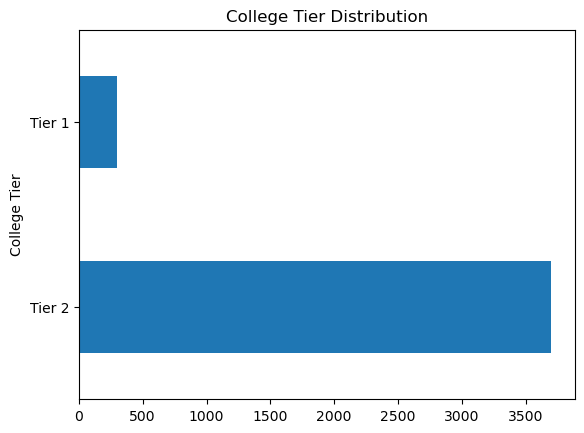

In [57]:
df['CollegeTier'].value_counts().plot(kind='barh', ylabel='College Tier', title='College Tier Distribution')
print(df['CollegeTier'].value_counts())

#### Observations
- Most of the colleges are **Tier 2** colleges.

Tier 0    2797
Tier 1    1201
Name: CollegeCityTier, dtype: int64


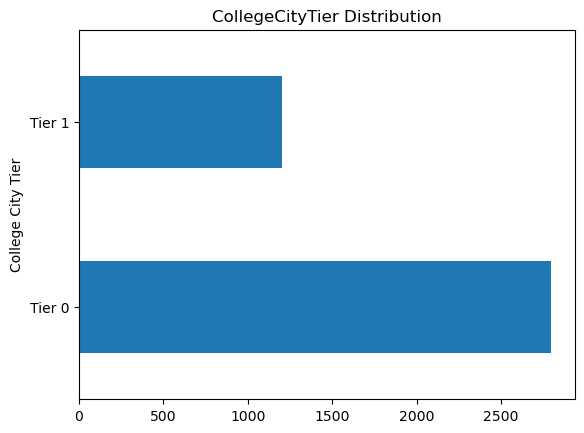

In [58]:
df['CollegeCityTier'].value_counts().plot(kind='barh', ylabel='College City Tier', title='CollegeCityTier Distribution')
print(df['CollegeCityTier'].value_counts())

#### Observations
- Most of the college are in **Tier 0** city.

<AxesSubplot:title={'center':'Distribution of Top 15 Cities'}, ylabel='City'>

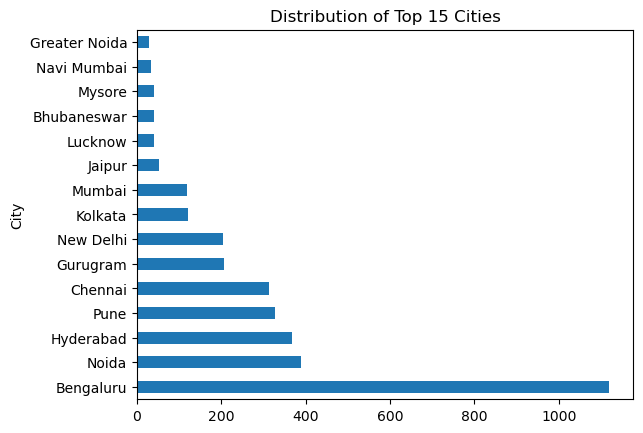

In [59]:
df['JobCity'].value_counts()[:15].plot(kind='barh', title='Distribution of Top 15 Cities', ylabel='City')

#### Obsevations
- **Bengaluru** is the most preffered Job City in the data provided.

Male      3041
Female     957
Name: Gender, dtype: int64


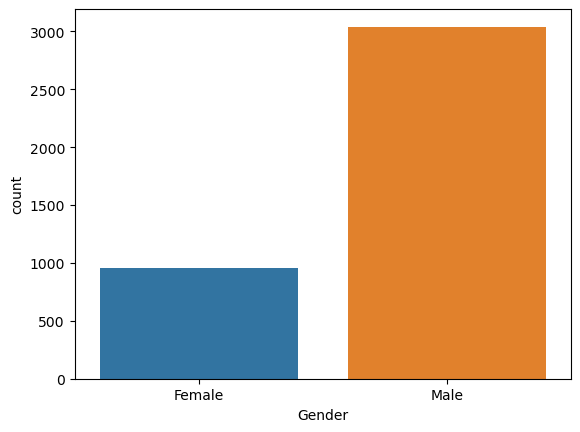

In [60]:
sns.countplot(data=df, x='Gender')
print(df['Gender'].value_counts())

#### Observations
- Ratio of Male to Female employees is almost **3.18 : 1**, indicating that Men are approximately 3 times more employed than Women.
- This fact is also clear from the graph as well.

State            1951
CBSE             1414
Not Mentioned     350
ICSE              283
Name: 10board, dtype: int64


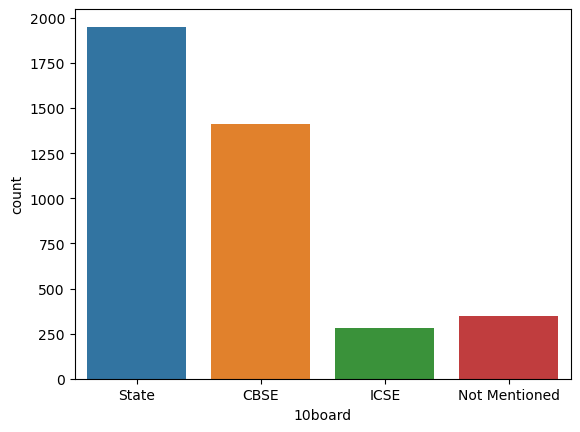

In [61]:
sns.countplot(data=df, x='10board')
print(df['10board'].value_counts())

#### Observations
- Most of the students passed 10th Board from a **State Board**.

State            2044
CBSE             1418
Not Mentioned     359
ICSE              177
Name: 12board, dtype: int64


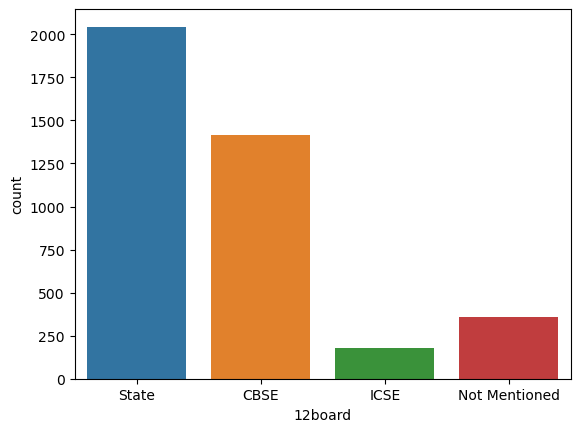

In [62]:
sns.countplot(data=df, x='12board')
print(df['12board'].value_counts())

#### Observations
- Most of the Students passed 12th Board from a **State Board**.

#### Observations for 10board & 12board
- ___A common observation is that almost same number of students have the same type of board and 10th and 12th class.___
- ___There is a slight decrease in the number of students who had ICSE board from 10th grade -> 12th grade.___

CS       2289
EC       1319
ME        220
EL         85
other      56
CE         29
Name: Specialization, dtype: int64


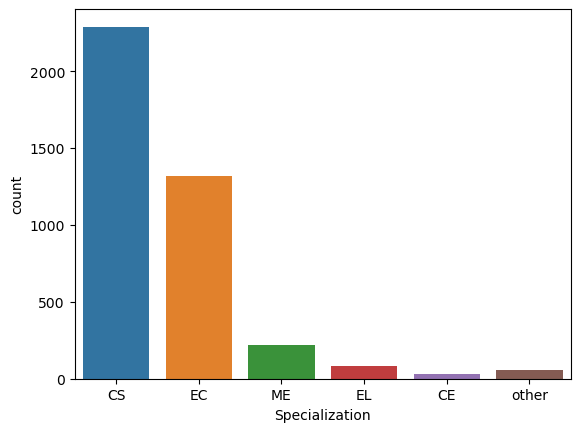

In [63]:
sns.countplot(data=df, x='Specialization')
print(df['Specialization'].value_counts())

#### Observations
- Most of the people have **CS** Specialization.

software engineer             539
software developer            265
system engineer               219
programmer analyst            139
systems engineer              118
java software engineer        111
software test engineer        100
project engineer               77
technical support engineer     76
senior software engineer       72
java developer                 67
test engineer                  57
web developer                  54
application developer          52
assistant manager              52
Name: Designation, dtype: int64


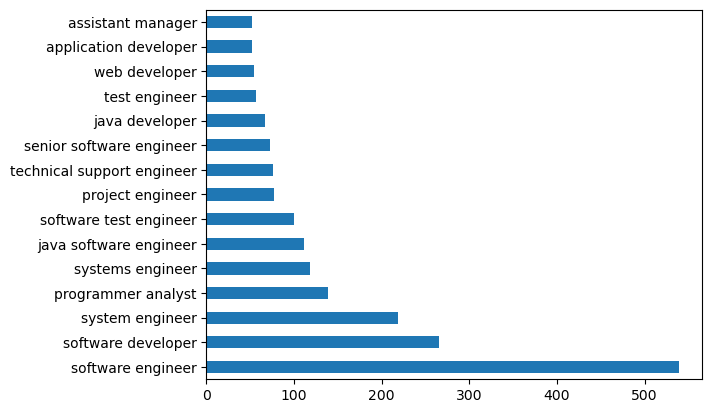

In [64]:
# Count plot for top 15 Designations
df['Designation'].value_counts()[:15].plot(kind='barh')
print(df['Designation'].value_counts()[:15])

#### Observations
- **software engineer** is the most popular designation. 

#### Observations for Specialization & Designation
- ___Since most students have 'CS' specialization, hence we can have a Hypothesis that most students have a designation related to that field, which is indeed a correct Hypothesis since most students have 'software engineer' as their designation and Software Engineering is indeed field of Computer Science (CS).___

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64


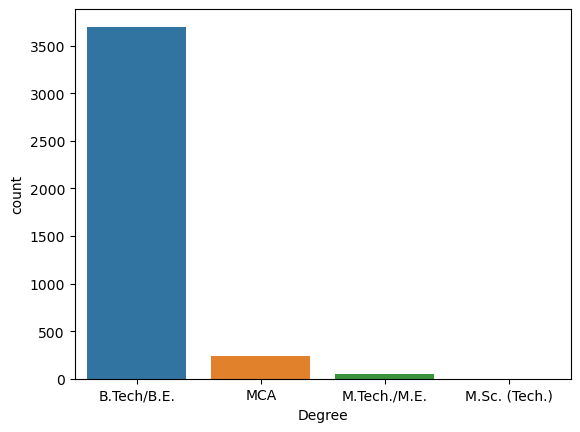

In [65]:
sns.countplot(data=df, x='Degree')
print(df['Degree'].value_counts())

#### Observations
- Most students in the AMCAT survey have the **B.Tech/B.E.** Degree

<AxesSubplot:xlabel='count', ylabel='CollegeState'>

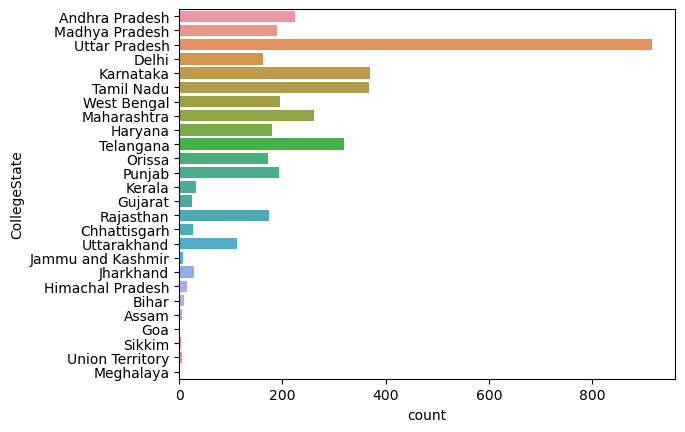

In [66]:
sns.countplot(data=df, y='CollegeState')

#### Observations
- Most of the students have their Colleges in **Uttar Pradesh**.

## Numerical Analysis

In [67]:
df[numerical_features].describe()

,Salary,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Age
count,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,3.076998e+05,77.925443,2008.087544,74.466366,71.486171,2012.609305,501.649075,501.598799,513.378189,0.610332,353.102801,-0.037831,0.146496,0.002763,-0.169033,-0.138110,5.755128,24.572536
std,2.127375e+05,9.850162,1.653599,10.999933,8.167338,1.315383,104.940021,86.783297,122.302332,0.264639,205.355519,1.028666,0.941782,0.951471,1.007580,1.008075,4.789783,1.767473
min,3.500000e+04,43.000000,1995.000000,40.000000,6.450000,2007.000000,180.000000,195.000000,120.000000,0.002750,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700,0.000000,18.000000
25%,1.800000e+05,71.680000,2007.000000,66.000000,66.407500,2012.000000,425.000000,445.000000,430.000000,0.413838,295.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200,1.000000,23.000000
50%,3.000000e+05,79.150000,2008.000000,74.400000,71.720000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300,3.000000,24.000000
75%,3.700000e+05,85.670000,2009.000000,82.600000,76.327500,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,0.702700,0.812800,0.672000,0.526200,0.502400,10.000000,26.000000
max,4.000000e+06,97.760000,2013.000000,98.700000,99.930000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,1.995300,1.904800,2.535400,3.352500,1.822400,33.000000,38.000000


- __Feature 'CollegeGPA' has minimum value of 6.45, which does not follow the correct pattern.__

In [68]:
incorrect=df[df['collegeGPA']<=10].shape[0]

print(f'There are {incorrect} rows in the CollegeGPA feature that do not follow the pattern.')

There are 12 rows in the CollegeGPA feature that do not follow the pattern.


In [69]:
df.loc[df['collegeGPA']<=10,'collegeGPA'] = (df.loc[df['collegeGPA']<=10,'collegeGPA']/10)*100
df['collegeGPA'].head()

0    78.00
1    70.06
2    70.00
3    74.64
4    73.90
Name: collegeGPA, dtype: float64

In [70]:
df.agg(
    {
        'Salary' : ['skew', 'kurt', 'var'],
 '10percentage' : ['skew', 'kurt', 'var'],
 '12graduation' : ['skew', 'kurt', 'var'],
 '12percentage' : ['skew', 'kurt', 'var'],
 'collegeGPA' : ['skew', 'kurt', 'var'],
 'GraduationYear' : ['skew', 'kurt', 'var'],
 'English' : ['skew', 'kurt', 'var'],
 'Logical' : ['skew', 'kurt', 'var'],
 'Quant' : ['skew', 'kurt', 'var'],
 'Domain' : ['skew', 'kurt', 'var'],
 'ComputerProgramming' : ['skew', 'kurt', 'var'],
 'conscientiousness' : ['skew', 'kurt', 'var'],
 'agreeableness' : ['skew', 'kurt', 'var'],
 'extraversion' : ['skew', 'kurt', 'var'],
 'nueroticism' : ['skew', 'kurt', 'var'],
 'openess_to_experience' : ['skew', 'kurt', 'var'],
 'Tenure' : ['skew', 'kurt', 'var'],
 'Age' : ['skew', 'kurt', 'var']
         }
)

,Salary,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Tenure,Age
skew,6.451081e+00,-0.591019,-0.964090,-0.032607,0.169940,-0.407569,0.191997,-0.216602,-0.019399,-0.407859,-0.778106,-0.527003,-1.204915,-0.523267,0.165710,-1.506962,0.188965,0.887271
kurt,8.093000e+01,-0.110284,1.951164,-0.630737,0.080064,-0.241278,-0.254133,-0.224761,-0.102472,-0.822505,-0.666352,0.122596,3.391242,0.643969,-0.191539,5.788327,-1.518729,1.826944
var,4.525724e+10,97.025700,2.734391,120.998528,54.858182,1.730231,11012.407969,7531.340624,14957.860440,0.070034,42170.889354,1.058153,0.886954,0.905298,1.015217,1.016214,22.942024,3.123959


- ___Feature 'Salary'___

<AxesSubplot:title={'center':'Summary Plot'}>

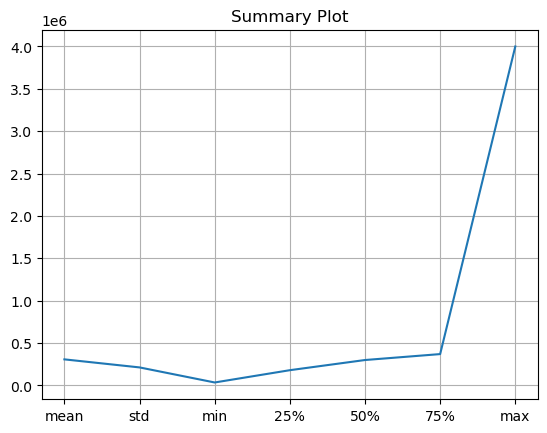

In [71]:
df['Salary'].describe()[1:].plot(grid=True, title='Summary Plot')

<AxesSubplot:title={'center':'KDE Plot for Salaries'}, ylabel='Density'>

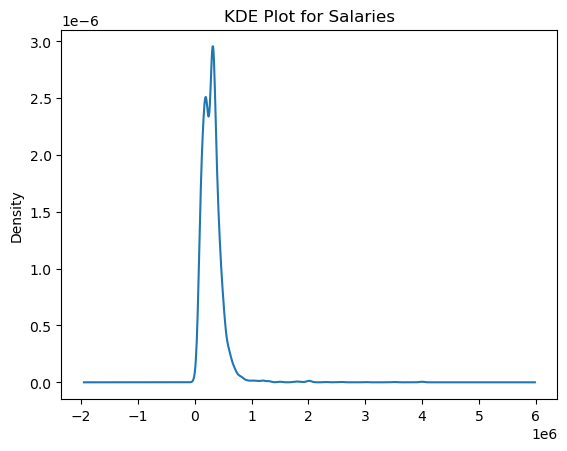

In [159]:
df['Salary'].plot(kind='kde', title='KDE Plot for Salaries')

<AxesSubplot:title={'center':'Bar Plot for Salaries'}>

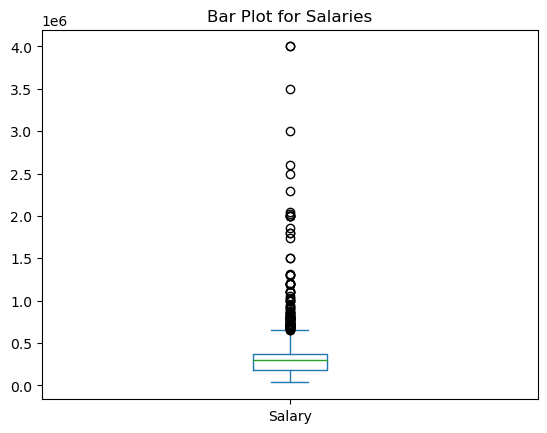

In [72]:
df['Salary'].plot(kind='box', title='Bar Plot for Salaries')

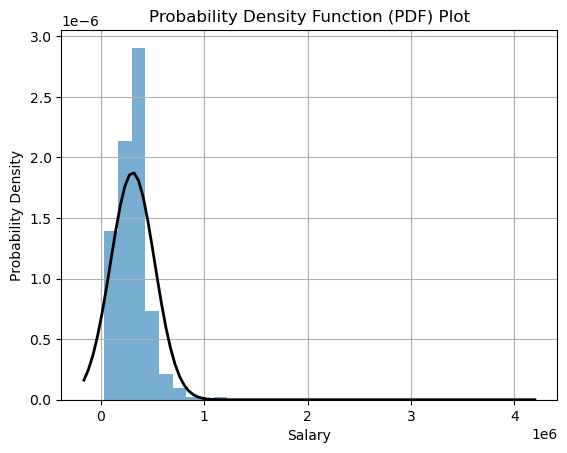

In [73]:
mu, sigma = norm.fit(df['Salary'])

# Plotting the histogram of the data with the probability density function (PDF) curve
plt.hist(df['Salary'], bins=30, density=True, alpha=0.6)  # Histogram
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)  # PDF curve

plt.title('Probability Density Function (PDF) Plot')
plt.xlabel('Salary')
plt.ylabel('Probability Density')
plt.grid(True)

# Show plot
plt.show()

##### Observations

| **Plots** | **Inferences** |
|---|---|
| 1. Summary Plot | There is substantial variation in salary across the dataset. |
| 2. KDE Plot |  Kernel Density Estimation (KDE) plot reveals a double peak in the data and large right skewness. skew = 6.45|
| 3. Histogram | The data exhibits significant positive skewness, with a skewness value around 6 (approximately) as indicated by the data description, indicating a departure from a normal distribution. The measures of central tendency (mean, median) are approximately equal. |
| 4. Box Plot | There is a notable concentration of data points with high salaries, as depicted by the box plot. |
| 5. PDF | The Probability distribution function (PDF) reveals a high degree of skewness in the data, high kurtosis  with considerable deviation from a normal distribution pattern. |

- ___Feature '10percentage'___

<AxesSubplot:title={'center':'Summary Plot'}>

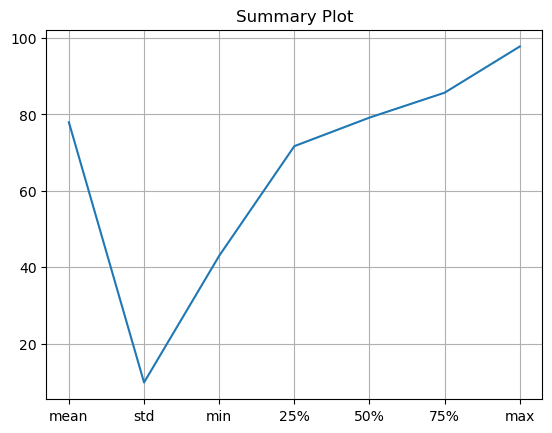

In [74]:
df['10percentage'].describe()[1:].plot(grid=True, title='Summary Plot')

<AxesSubplot:title={'center':'KDE Plot for percentage scored in class 10th'}, ylabel='Density'>

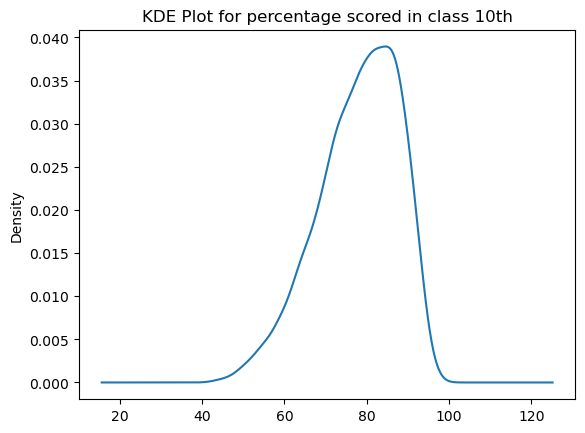

In [162]:
df['10percentage'].plot(kind='kde',title='KDE Plot for percentage scored in class 10th')

<AxesSubplot:title={'center':'Box Plot for percentage scored in class 1oth'}>

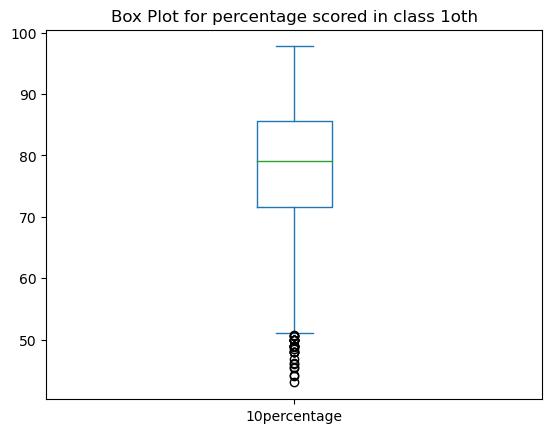

In [144]:
df['10percentage'].plot(kind='box',title='Box Plot for percentage scored in class 1oth')

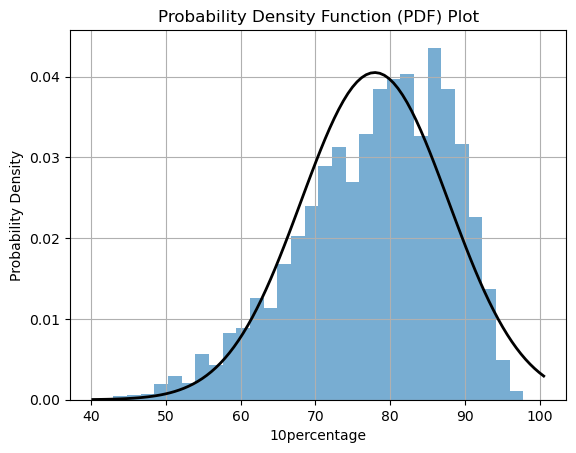

In [76]:
mu, sigma = norm.fit(df['10percentage'])

# Plotting the histogram of the data with the probability density function (PDF) curve
plt.hist(df['10percentage'], bins=30, density=True, alpha=0.6)  # Histogram
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)  # PDF curve

plt.title('Probability Density Function (PDF) Plot')
plt.xlabel('10percentage')
plt.ylabel('Probability Density')
plt.grid(True)

# Show plot
plt.show()

##### Observations

| **Plots** | **Inferences** |
|---|---|
| 1. Summary Plot | The variation in the distribution of percentage seems linear. |
| 2. KDE Plot | The  Kernel Density Estimation (KDE) plot has a bell shape but the figure is not symmetrical. |
| 3. Histogram | The data exhibits slight negative skewness, with a skewness value around -0.59 (approximately) as indicated by the data description, indicating that the distribution is almost normal. The measures of central tendency (mean, median) are quite close to each other, 77.9 and 79.15 respectively. |
| 4. Box Plot | There is a notable concentration of data points with low percentage scored, as depicted by the box plot. |
| 5. PDF | The Probability distribution function (PDF) reveals a low degree of skewness in the data, low kurtosis because of flatter peak i.e. the distribution is almost a normal distribution pattern. |


- ___Feature '12graduation'___

<AxesSubplot:title={'center':'Summary Plot'}>

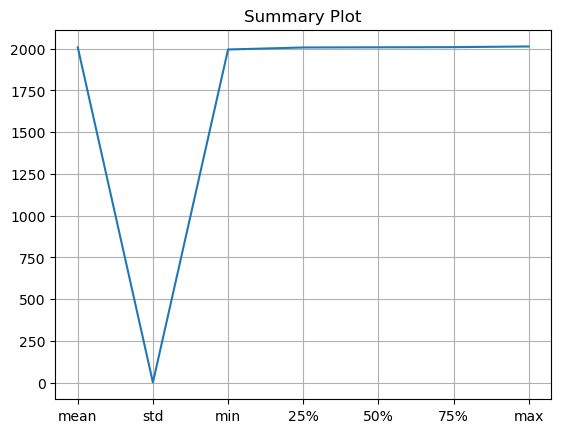

In [143]:
df['12graduation'].describe()[1:].plot(grid=True, title='Summary Plot')

<AxesSubplot:title={'center':'Box Plot for Graduation Year of Class 12th'}>

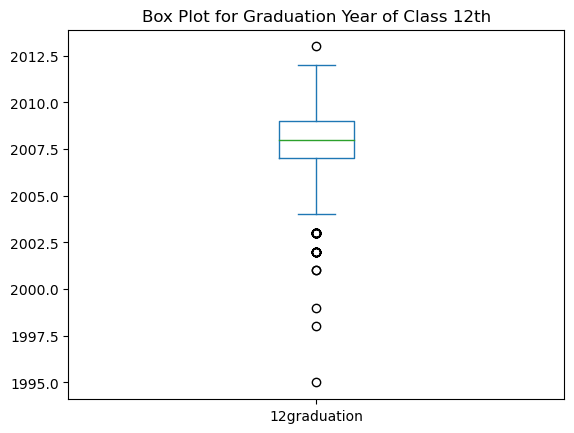

In [145]:
df['12graduation'].plot(kind='box', title='Box Plot for Graduation Year of Class 12th')

<AxesSubplot:title={'center':'Histogram for Graduation Year of Class 12th'}, ylabel='Frequency'>

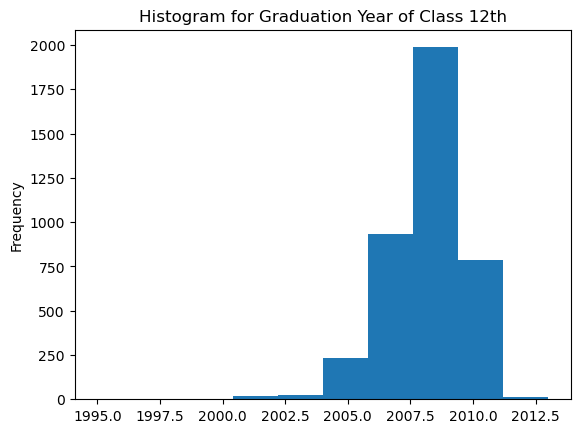

In [158]:
df['12graduation'].plot(kind='hist', title='Histogram for Graduation Year of Class 12th')

<AxesSubplot:title={'center':'KDE Plot for Graduation Year of Class 12th'}, ylabel='Density'>

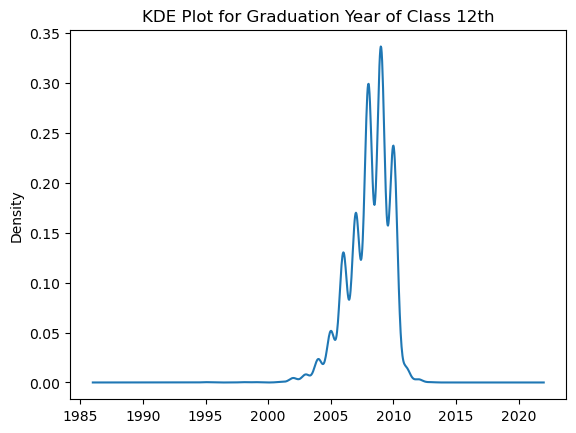

In [157]:
df['12graduation'].plot(kind='kde', title='KDE Plot for Graduation Year of Class 12th')

##### Observations

| **Plots** | **Inferences** |
|---|---|
| 1. Summary Plot | The variation in the distribution of graduating years seems uniform. |
| 2. Histogram | The data exhibits negative skewness, with a skewness value around -0.96 (approximately) as indicated by the data description, indicating that the distribution is not normal. The measures of central tendency (mean, median) equal. There is a high concentration of data in range 2005 to 2011.|
| 3. Box Plot | There is a notable concentration of data points with low percentage scored, as depicted by the box plot. |
| 4. KDE Plot |  Kernel Density Estimation (KDE) reveals a -ve degree of skewness in the data, multiple peaks  i.e. the distribution is not a normal distribution pattern. This is proved further by calculating kurtosis which is equal to 1.95 .|


- ___Feature '12percentage'___

<AxesSubplot:title={'center':'Summary Plot'}>

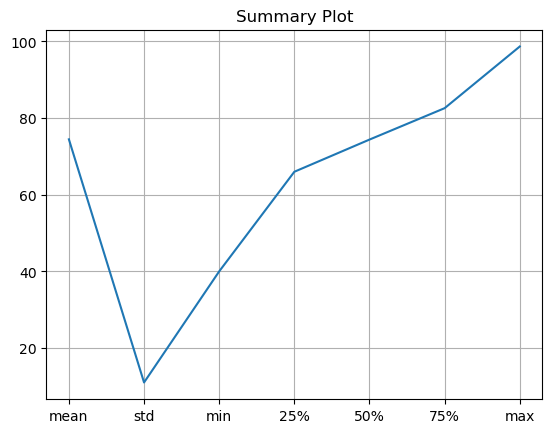

In [150]:
df['12percentage'].describe()[1:].plot(grid=True, title='Summary Plot')

<AxesSubplot:title={'center':'KDE plot for 12th precentage'}, ylabel='Density'>

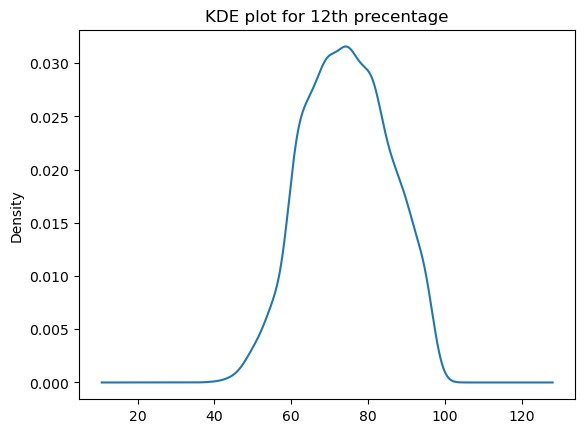

In [167]:
df['12percentage'].plot(kind='kde', title='KDE plot for 12th precentage')

<AxesSubplot:title={'center':'Box plot for 12th precentage'}>

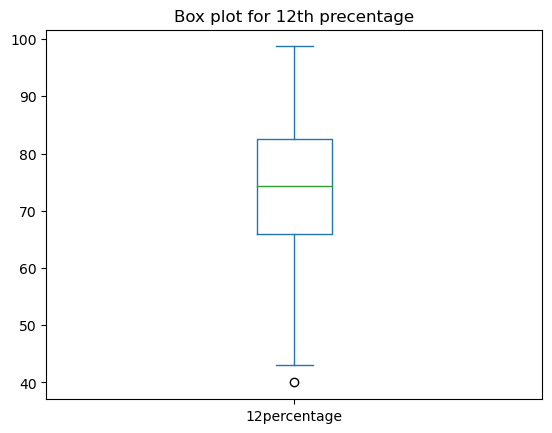

In [171]:
df['12percentage'].plot(kind='box', title='Box plot for 12th precentage')

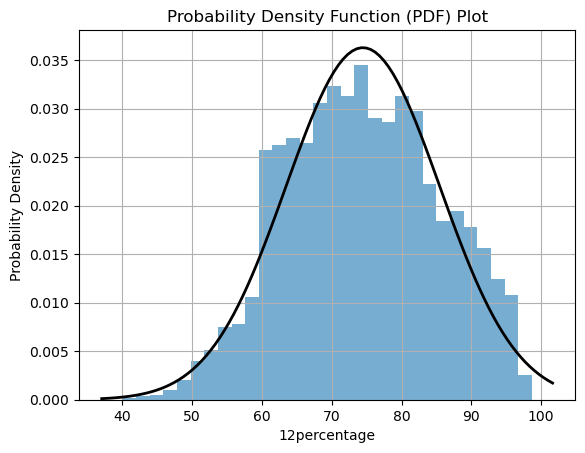

In [174]:
mu, sigma = norm.fit(df['12percentage'])

# Plotting the histogram of the data with the probability density function (PDF) curve
plt.hist(df['12percentage'], bins=30, density=True, alpha=0.6)  # Histogram
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)  # PDF curve

plt.title('Probability Density Function (PDF) Plot')
plt.xlabel('12percentage')
plt.ylabel('Probability Density')
plt.grid(True)

# Show plot
plt.show()

##### Observations

| **Plots** | **Inferences** |
|---|---|
| 1. Summary Plot | The variation in the distribution of percentage seems linear. |
| 2. KDE Plot | The  Kernel Density Estimation (KDE) plot has a bell shape but the figure is not symmetrical. |
| 3. Histogram | The data exhibits very slight negative skewness, with a skewness value around -0.03 (approximately) as indicated by the data description. The measures of central tendency (mean, median) are almost equal to each other, 74.46 and 74.40 respectively. |
| 4. Box Plot | The distribution of data is great throughout the range with very few outliers. |
| 5. PDF | The Probability distribution function (PDF) reveals a low degree of skewness in the data, low kurtosis because of flatter peak but high variability in the data as the curve is very wide i.e. the distribution is almost a normal distribution pattern. |


- ___Feature 'collegeGPA'___

<AxesSubplot:title={'center':'Summary Plot'}>

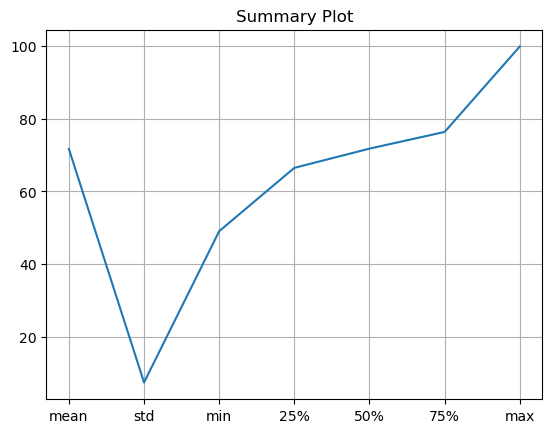

In [178]:
df['collegeGPA'].describe()[1:].plot(grid=True, title='Summary Plot')

<AxesSubplot:title={'center':'KDE plot of College GPA'}, ylabel='Density'>

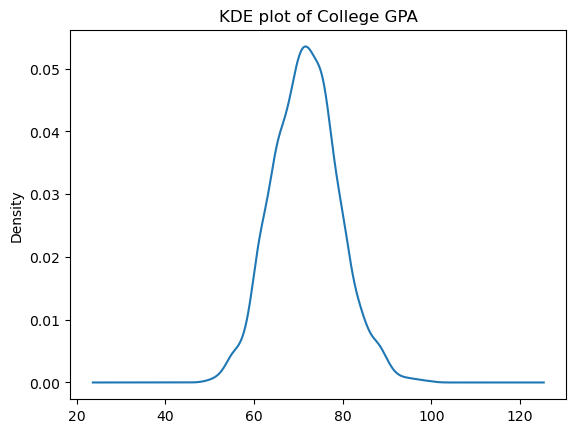

In [179]:
df['collegeGPA'].plot(kind='kde', title='KDE plot of College GPA')

<AxesSubplot:title={'center':'Box Plot for College GPA'}>

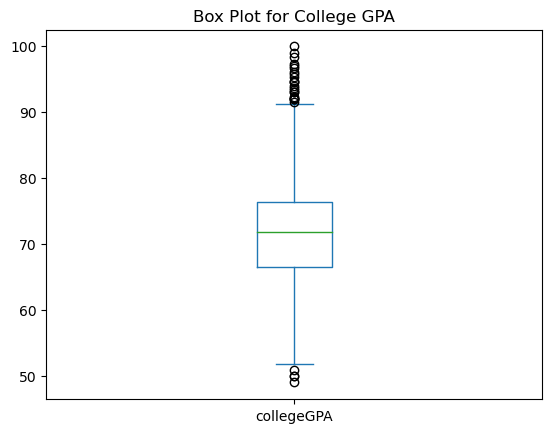

In [180]:
df['collegeGPA'].plot(kind='box', title='Box Plot for College GPA')

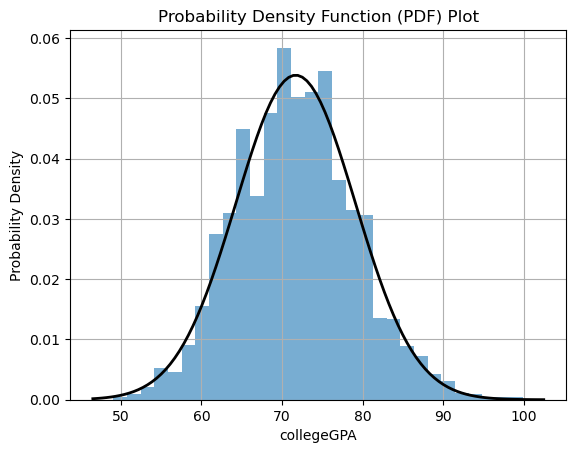

In [88]:
mu, sigma = norm.fit(df['collegeGPA'])

# Plotting the histogram of the data with the probability density function (PDF) curve
plt.hist(df['collegeGPA'], bins=30, density=True, alpha=0.6)  # Histogram
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)  # PDF curve

plt.title('Probability Density Function (PDF) Plot')
plt.xlabel('collegeGPA')
plt.ylabel('Probability Density')
plt.grid(True)

# Show plot
plt.show()

##### Observations

| **Plots** | **Inferences** |
|---|---|
| 1. Summary Plot | The variation in the distribution of percentage seems linear. |
| 2. KDE Plot | The  Kernel Density Estimation (KDE) plot has a bell shape but the figure is irregular and peak is very pointed. |
| 3. Histogram | The data exhibits very slight positive skewness, with a skewness value around 0.17 (approximately) as indicated by the data description. The measures of central tendency (mean, median) are almost equal to each other, 71.69 and 71.80 respectively. |
| 4. Box Plot | The distribution of data is very concetrated with higher value outliers, with very low data spread in the 25% to 75% range. |
| 5. PDF | The Probability distribution function (PDF) reveals a low degree of skewness in the data, avg kurtosis because of flatter peak, decent variability in the data i.e. the distribution is not a normal distribution pattern. |

- ___Feature 'GraduationYear'___

<AxesSubplot:title={'center':'Summary Plot'}>

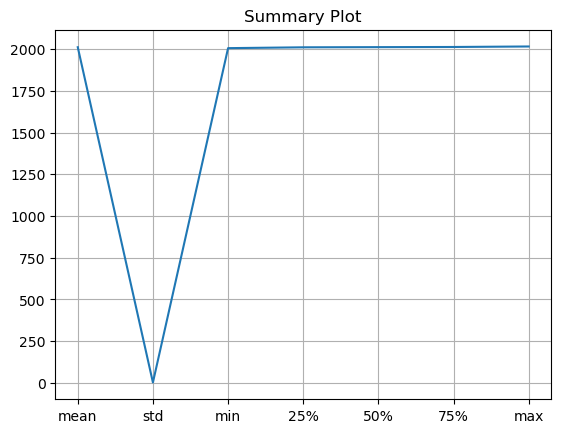

In [184]:
df['GraduationYear'].describe()[1:].plot(grid=True, title='Summary Plot')

<AxesSubplot:title={'center':'KDE plot for Graduation Year'}, ylabel='Density'>

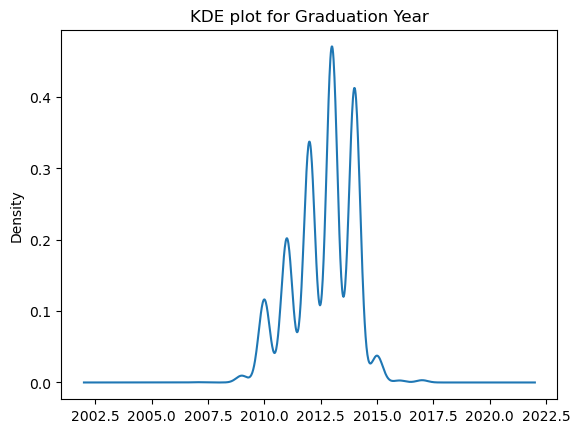

In [185]:
df['GraduationYear'].plot(kind='kde', title='KDE plot for Graduation Year')

<AxesSubplot:title={'center':'Box plot for Graduation Year'}>

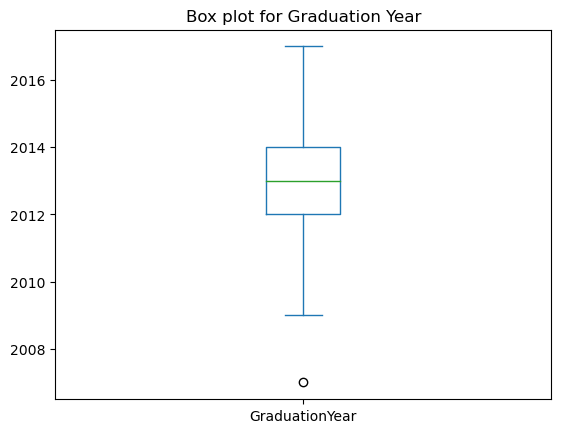

In [186]:
df['GraduationYear'].plot(kind='box', title='Box plot for Graduation Year')

##### Observations

| **Plots** | **Inferences** |
|---|---|
| 1. Summary Plot | The variation in the distribution of graduating years seems uniform. |
| 2. Histogram | The data exhibits slight negative skewness, with a skewness value around -0.40 (approximately) as indicated by the data description, indicating that the distribution is not normal. The measures of central tendency (mean, median) are approximately equal, 2012.60 and 2013 repectively. There is a high concentration of data in range 2009 to 2014.|
| 3. Box Plot | There are very small number of outliers in the data and all of them are below the lower IQR. |
| 4. KDE Plot |  Kernel Density Estimation (KDE) reveals a -ve degree of skewness in the data, multiple peaks  i.e. the distribution is not a normal distribution pattern. This is proved further by calculating kurtosis which is equal to -0.24 .|


- ___Feature 'English'___

<AxesSubplot:title={'center':'Summary Plot'}>

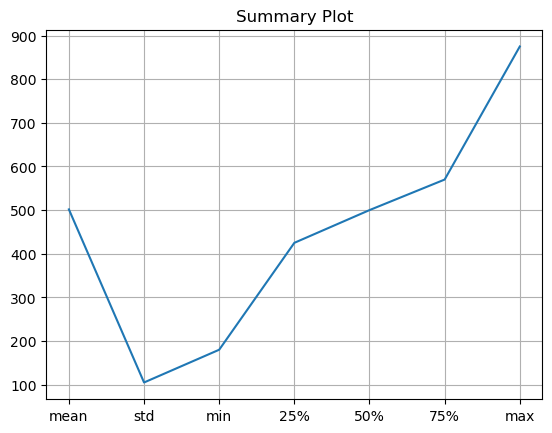

In [190]:
df['English'].describe()[1:].plot(grid=True, title='Summary Plot')

<AxesSubplot:title={'center':'KDE plot for marks scored in English Section'}, ylabel='Density'>

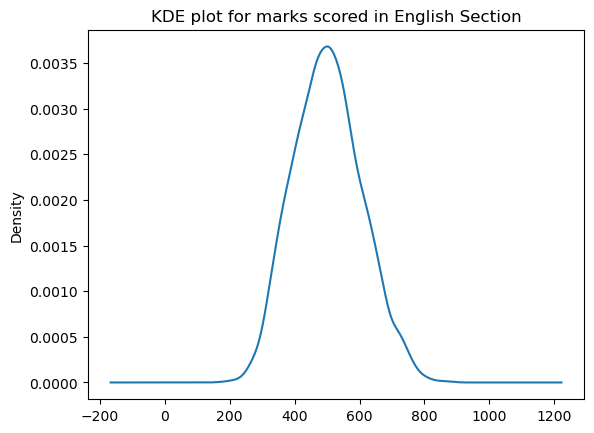

In [191]:
df['English'].plot(kind='kde', title='KDE plot for marks scored in English Section')

<AxesSubplot:title={'center':'Box plot for marks scored in English Section'}>

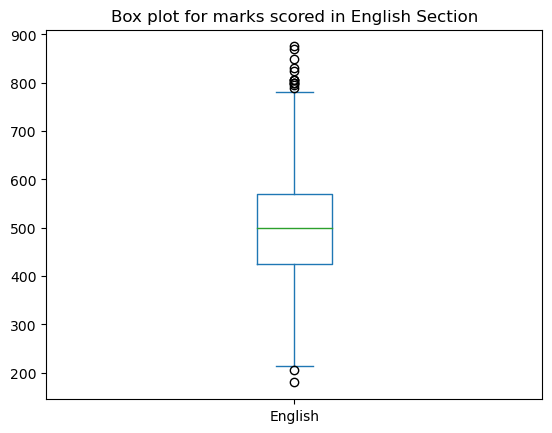

In [192]:
df['English'].plot(kind='box', title='Box plot for marks scored in English Section')

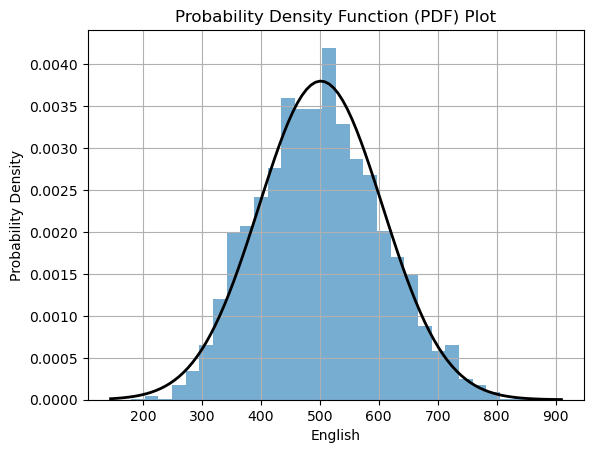

In [96]:
mu, sigma = norm.fit(df['English'])

# Plotting the histogram of the data with the probability density function (PDF) curve
plt.hist(df['English'], bins=30, density=True, alpha=0.6)  # Histogram
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)  # PDF curve

plt.title('Probability Density Function (PDF) Plot')
plt.xlabel('English')
plt.ylabel('Probability Density')
plt.grid(True)

# Show plot
plt.show()

##### Observations

| **Plots** | **Inferences** |
|---|---|
| 1. Summary Plot | The variation in the distribution of marks in English Section seems uneven. |
| 2. KDE Plot | The  Kernel Density Estimation (KDE) plot has a bell shape but the figure is not uniform throughout and peak is slightly pointed. |
| 3. Histogram | The data exhibits very slight positive skewness, with a skewness value around 0.19 (approximately) as indicated by the data description. The measures of central tendency (mean, median) are almost equal to each other, 501.64 and 500 respectively. |
| 4. Box Plot | The distribution of data is very concetrated with higher value outliers (>790), with low data spread in the 25% to 75% range and very few outliers below the lower quartile range. |
| 5. PDF | The Probability distribution function (PDF) reveals a low degree of skewness in the data, avg kurtosis because of flatter peak, decent variability in the data i.e. the distribution is not a normal distribution pattern but very close to being one. |

- ___Feature 'Logical'___

<AxesSubplot:title={'center':'Summary Plot'}>

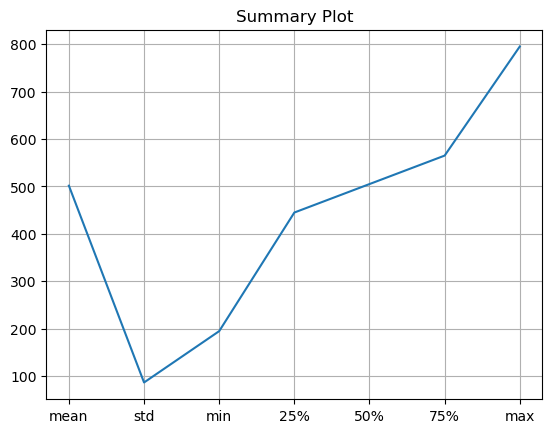

In [196]:
df['Logical'].describe()[1:].plot(grid=True, title='Summary Plot')

<AxesSubplot:title={'center':'KDE plot for marks scored in Logical section'}, ylabel='Density'>

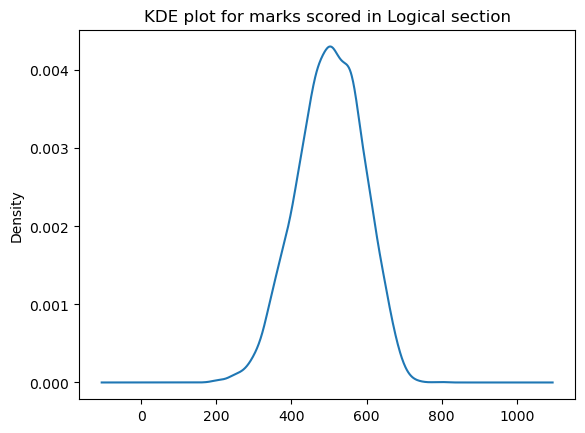

In [197]:
df['Logical'].plot(kind='kde', title='KDE plot for marks scored in Logical section')

<AxesSubplot:title={'center':'Box plot for marks scored in Logical section'}>

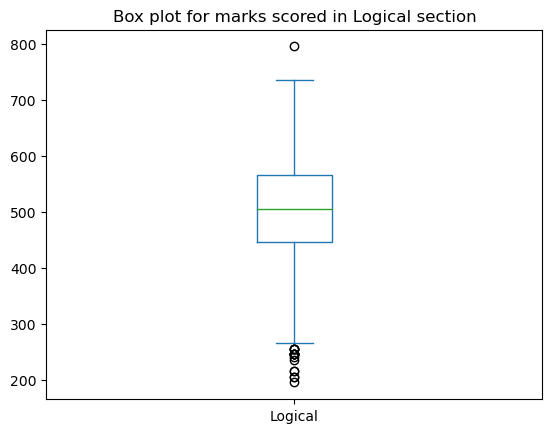

In [198]:
df['Logical'].plot(kind='box', title='Box plot for marks scored in Logical section')

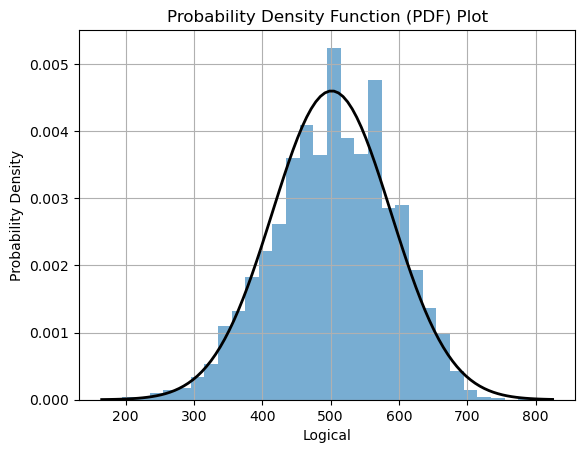

In [100]:
mu, sigma = norm.fit(df['Logical'])

# Plotting the histogram of the data with the probability density function (PDF) curve
plt.hist(df['Logical'], bins=30, density=True, alpha=0.6)  # Histogram
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)  # PDF curve

plt.title('Probability Density Function (PDF) Plot')
plt.xlabel('Logical')
plt.ylabel('Probability Density')
plt.grid(True)

# Show plot
plt.show()

##### Observations

| **Plots** | **Inferences** |
|---|---|
| 1. Summary Plot | The variation in the distribution of marks score in Logical Section seems uneven. |
| 2. KDE Plot | The  Kernel Density Estimation (KDE) plot has a bell shape but the figure is not uniform throughout and the distribution is almost having a double peak, and is not symmetrical as well as transition into left and right tail is very different. |
| 3. Histogram | The data exhibits very slight negative skewness, with a skewness value around -0.21 (approximately) as indicated by the data description. The measures of central tendency (mean, median) are quite close to each other, 501.59 and 505 respectively. |
| 4. Box Plot | The distribution of data is very concetrated with higher value outliers (>790), with low data spread in the 25% to 75% range and very few outliers below the lower quartile range. |
| 5. PDF | The Probability distribution function (PDF) reveals a low degree of skewness in the data, -ve kurtosis because of flatter peak, decent variability in the data as it is neither too wide nor too sharp i.e. the distribution is not a normal distribution pattern but very close to being one. |

- ___Feature 'Quant'___

<AxesSubplot:title={'center':'Summary Plot'}>

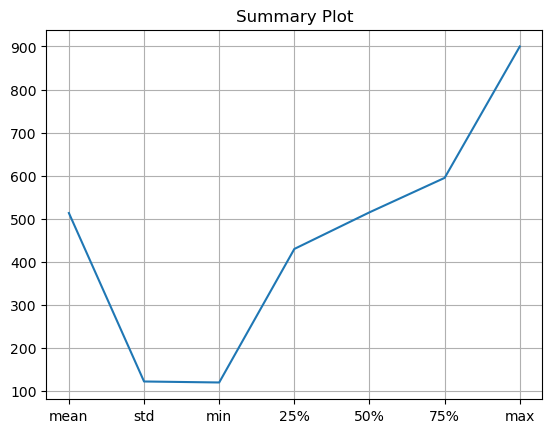

In [205]:
df['Quant'].describe()[1:].plot(grid=True, title='Summary Plot')

<AxesSubplot:title={'center':'KDE plot for marks scored in Quantative Section'}, ylabel='Density'>

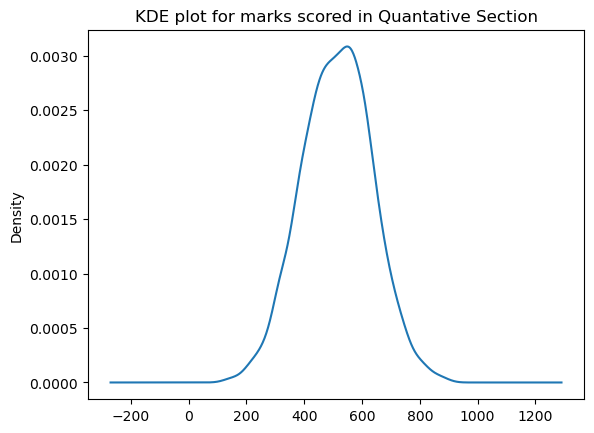

In [206]:
df['Quant'].plot(kind='kde', title='KDE plot for marks scored in Quantative Section')

<AxesSubplot:title={'center':'KDE plot for marks scored in Quantative Section'}>

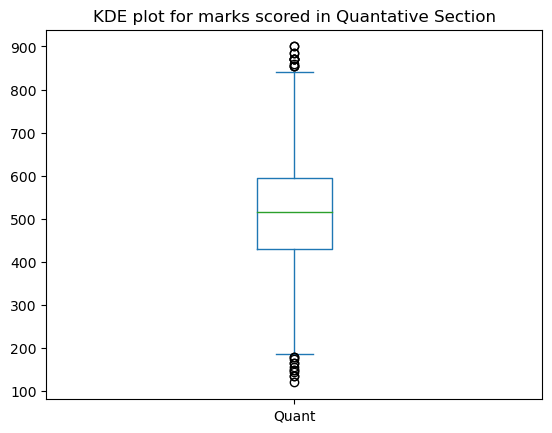

In [207]:
df['Quant'].plot(kind='box', title='KDE plot for marks scored in Quantative Section')

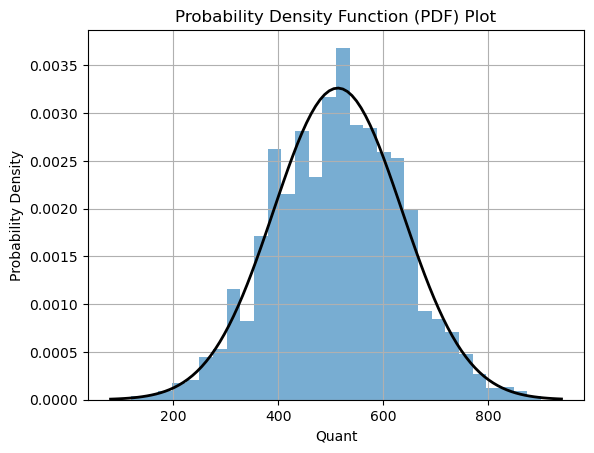

In [104]:
mu, sigma = norm.fit(df['Quant'])

# Plotting the histogram of the data with the probability density function (PDF) curve
plt.hist(df['Quant'], bins=30, density=True, alpha=0.6)  # Histogram
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)  # PDF curve

plt.title('Probability Density Function (PDF) Plot')
plt.xlabel('Quant')
plt.ylabel('Probability Density')
plt.grid(True)

# Show plot
plt.show()

In [210]:
df['Quant'].kurt()

-0.10247207606308217

##### Observations

| **Plots** | **Inferences** |
|---|---|
| 1. Summary Plot | The variation in the distribution of marks score in Logical Section seems uneven and very steep deviation from min->25%, 25%->75% and very very steep for 75%->Max. Which means data distribution is not uniform at all within the inter quartile ranges. |
| 2. KDE Plot | The  Kernel Density Estimation (KDE) plot has a bell shape but the figure is not uniform throughout and the distribution is almost having a flat peak, and is not symmetrical as well. |
| 3. Histogram | The data exhibits very very slight negative skewness, with a skewness value around -0.02 (approximately) as indicated by the data description. The measures of central tendency (mean, median) are quite close to each other, 513.37 and 515 respectively. |
| 4. Box Plot | The distribution of data is very concetrated with outliers (>840 and <190), with low data spread in the 25% to 75% range. But no extreme outliers are visible. |
| 5. PDF | The Probability distribution function (PDF) reveals a low degree of skewness in the data, -ve kurtosis because of flatter peak, good variability in the data as it is neither too wide nor too sharp i.e. the distribution is not a normal distribution pattern but very close to being one. |

- ___Feature 'Domain'___

<AxesSubplot:title={'center':'Summary Plot'}>

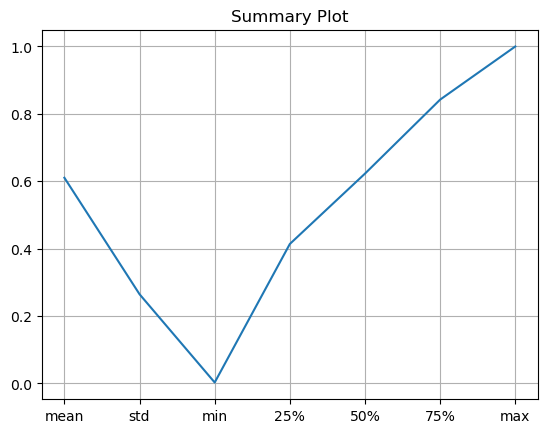

In [211]:
df['Domain'].describe()[1:].plot(grid=True, title='Summary Plot')

<AxesSubplot:title={'center':'KDE plot for scores in Domain Module'}, ylabel='Density'>

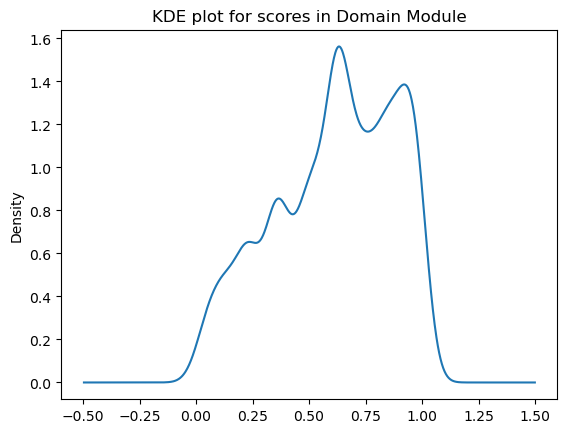

In [212]:
df['Domain'].plot(kind='kde', title='KDE plot for scores in Domain Module')

<AxesSubplot:title={'center':'Box plot for scores in Domain Module'}>

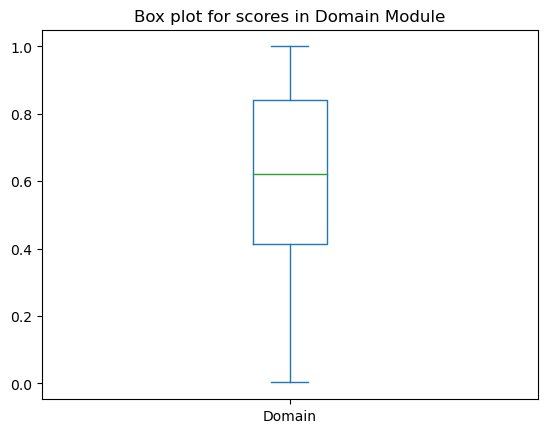

In [214]:
df['Domain'].plot(kind='box', title='Box plot for scores in Domain Module')

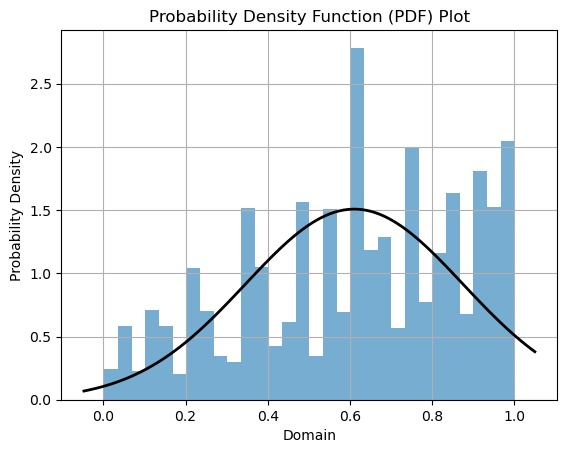

In [108]:
mu, sigma = norm.fit(df['Domain'])

# Plotting the histogram of the data with the probability density function (PDF) curve
plt.hist(df['Domain'], bins=30, density=True, alpha=0.6)  # Histogram
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)  # PDF curve

plt.title('Probability Density Function (PDF) Plot')
plt.xlabel('Domain')
plt.ylabel('Probability Density')
plt.grid(True)

# Show plot
plt.show()

##### Observations

| **Plots** | **Inferences** |
|---|---|
| 1. Summary Plot | The variation in the distribution of marks score in Domain module seems Linear from 25% -> Max range. |
| 2. KDE Plot | The  Kernel Density Estimation (KDE) plot does not have a bell shape, has presence of multiple peaks and all values are saturated between range 0 to 1 since the data is standardized. |
| 3. Histogram | The data exhibits slight negative skewness, with a skewness value around -0.40 (approximately) as indicated by the data description. The measures of central tendency (mean, median) are quite close to each other, 0.61 and 0.62 respectively. |
| 4. Box Plot | The distribution of data is very good because of standardization and there is no presence of outliers. |
| 5. PDF | The Probability distribution function (PDF) reveals a low degree of -ve skewness in the data, -ve kurtosis because of flatter peak, great variability in the data as it is quite wide and all values are concentrated in range 0 to 1 i.e. the distribution is not a normal distribution. |

- ___Feature 'ComputerProgramming'___

<AxesSubplot:title={'center':'Summary Plot'}>

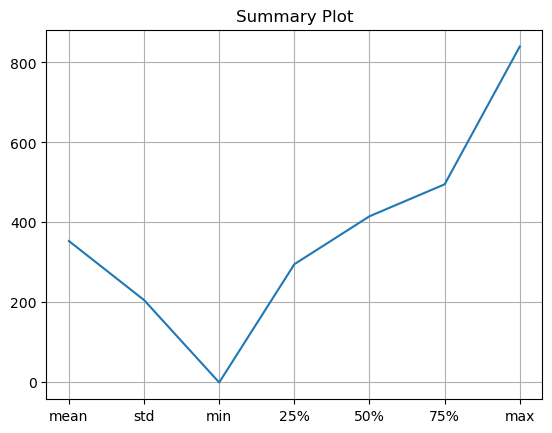

In [219]:
df['ComputerProgramming'].describe()[1:].plot(grid=True, title='Summary Plot')

<AxesSubplot:title={'center':'KDE plot for Marks in Computer Programming Section'}, ylabel='Density'>

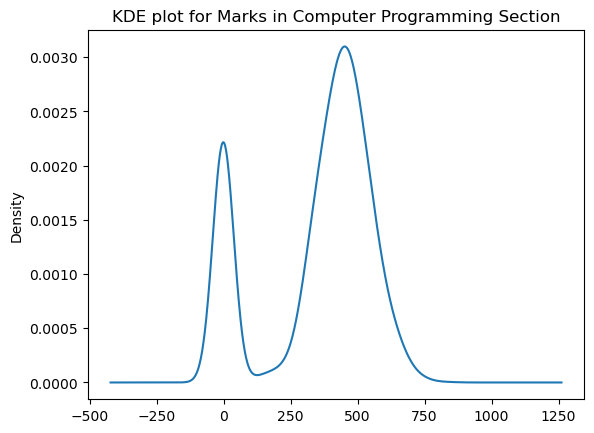

In [220]:
df['ComputerProgramming'].plot(kind='kde', title='KDE plot for Marks in Computer Programming Section')

<AxesSubplot:title={'center':'Box plot for Marks in Computer Programming Section'}>

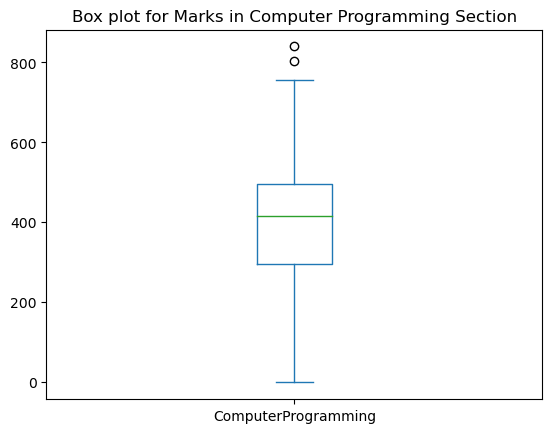

In [221]:
df['ComputerProgramming'].plot(kind='box', title='Box plot for Marks in Computer Programming Section')

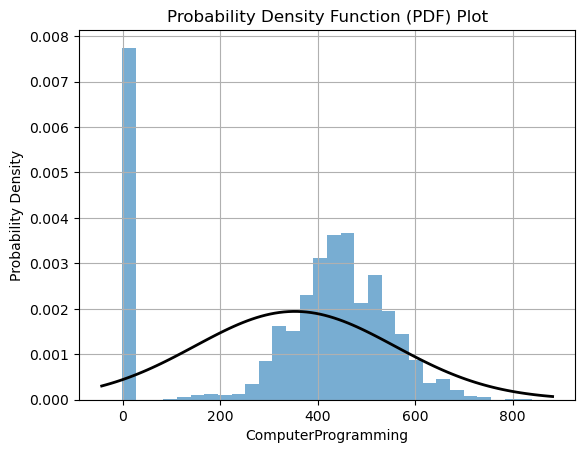

In [112]:
mu, sigma = norm.fit(df['ComputerProgramming'])

# Plotting the histogram of the data with the probability density function (PDF) curve
plt.hist(df['ComputerProgramming'], bins=30, density=True, alpha=0.6)  # Histogram
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)  # PDF curve

plt.title('Probability Density Function (PDF) Plot')
plt.xlabel('ComputerProgramming')
plt.ylabel('Probability Density')
plt.grid(True)

# Show plot
plt.show()

In [226]:
df['ComputerProgramming'].kurt()

-0.6663518344809041

##### Observations

| **Plots** | **Inferences** |
|---|---|
| 1. Summary Plot | The variation in the distribution of marks score in Domain module seems exponential from 75% -> Max range. |
| 2. KDE Plot | The  Kernel Density Estimation (KDE) plot does not have a bell shape, but because of people not attempting the section there is a presence of significant Double peaks. |
| 3. Histogram | The data exhibits slight negative skewness, with a skewness value around -0.77 (approximately) as indicated by the data description. The measures of central tendency (mean, median) are quite different from each other because of presence of people not attempting the section, 353.101 and 415 respectively. |
| 4. Box Plot | The distribution of data is good with no outliers below the lower quartile range but few outliers are present above the upper quartile range (>780). |
| 5. PDF | The Probability distribution function (PDF) reveals a low degree of -ve skewness in the data, -ve kurtosis because of very flat peak, great variability in the data as it is quite wide i.e. the distribution is not a normal distribution. |

- ___Feature 'conscientiousness'___

<AxesSubplot:title={'center':'Summary Plot'}>

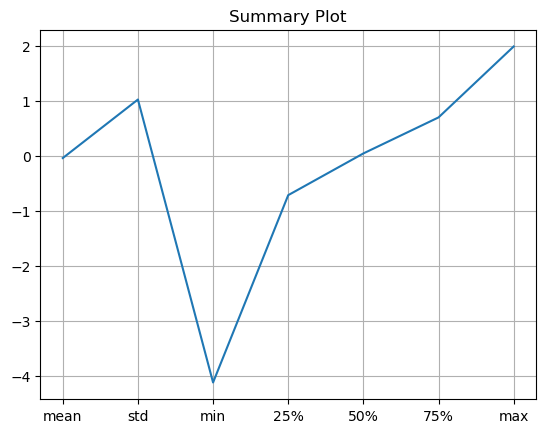

In [227]:
df['conscientiousness'].describe()[1:].plot(grid=True, title='Summary Plot')

<AxesSubplot:title={'center':'KDE plot for marks scored in conscientiousness section'}, ylabel='Density'>

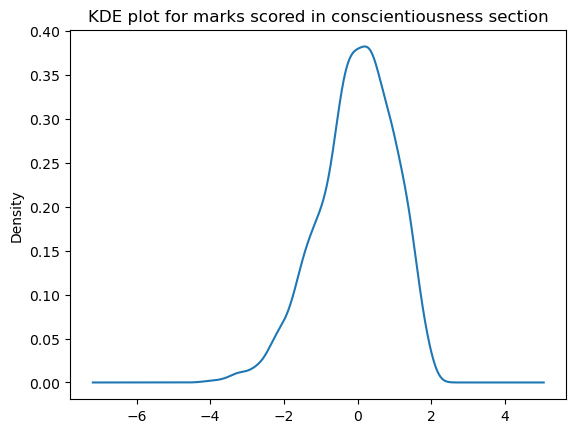

In [228]:
df['conscientiousness'].plot(kind='kde', title='KDE plot for marks scored in conscientiousness section')

<AxesSubplot:title={'center':'KDE plot for marks scored in conscientiousness section'}>

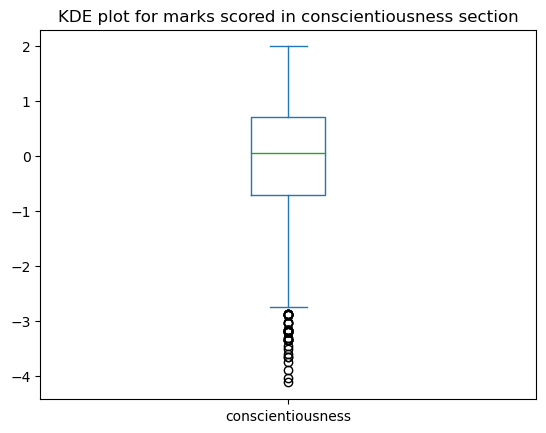

In [229]:
df['conscientiousness'].plot(kind='box', title='KDE plot for marks scored in conscientiousness section')

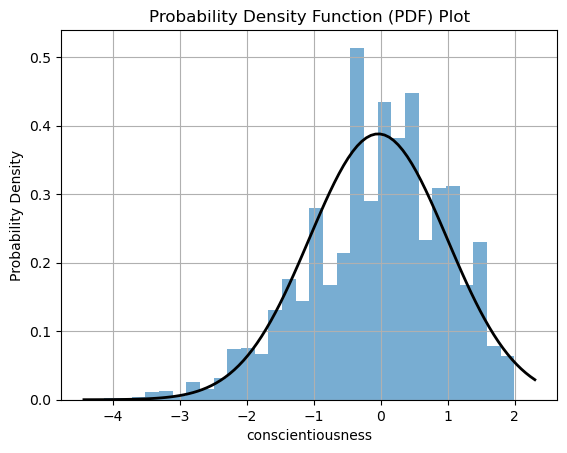

In [116]:
mu, sigma = norm.fit(df['conscientiousness'])

# Plotting the histogram of the data with the probability density function (PDF) curve
plt.hist(df['conscientiousness'], bins=30, density=True, alpha=0.6)  # Histogram
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)  # PDF curve

plt.title('Probability Density Function (PDF) Plot')
plt.xlabel('conscientiousness')
plt.ylabel('Probability Density')
plt.grid(True)

# Show plot
plt.show()

##### Observations

| **Plots** | **Inferences** |
|---|---|
| 1. Summary Plot | The variation in the distribution of marks score in conscientiousness module seems linear from 25% -> Max range and exponential in min->25% range. |
| 2. KDE Plot | The  Kernel Density Estimation (KDE) plot has a bell shape, but its not regular, presence of left skewness. |
| 3. Histogram | The data exhibits slight negative skewness, with a skewness value around -0.52 (approximately) as indicated by the data description. The measures of central tendency (mean, median) are quite close to each other because of presence of people not attempting the section, -0.037831 and 0.046400 respectively. |
| 4. Box Plot | The distribution of data is good but there is significant presence of outliers below the lower quartile range. |
| 5. PDF | The Probability distribution function (PDF) reveals a low degree of -ve skewness in the data, +ve kurtosis because of flatter peak, great variability in the data as it is quite wide but the distribution is not a normal distribution. |

- ___Feature 'agreeableness'___

<AxesSubplot:title={'center':'Summary Plot'}>

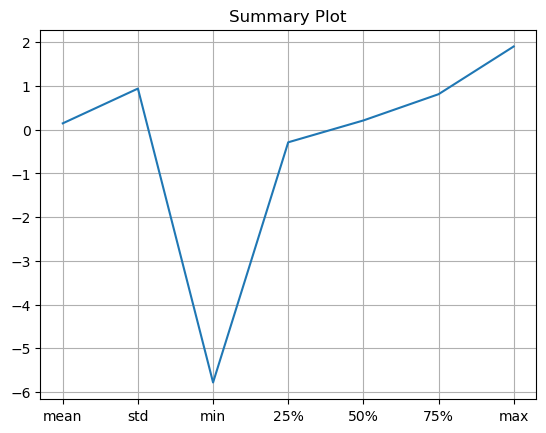

In [233]:
df['agreeableness'].describe()[1:].plot(grid=True, title='Summary Plot')

<AxesSubplot:title={'center':'KDE plot for marks scored in agreeableness section'}, ylabel='Density'>

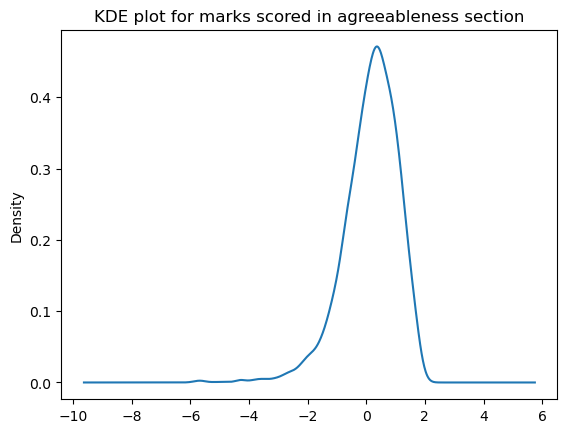

In [234]:
df['agreeableness'].plot(kind='kde', title='KDE plot for marks scored in agreeableness section')

<AxesSubplot:title={'center':'Box plot for marks scored in agreeableness section'}>

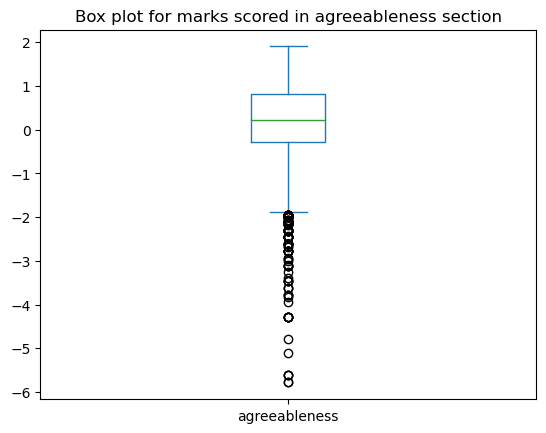

In [235]:
df['agreeableness'].plot(kind='box',  title='Box plot for marks scored in agreeableness section')

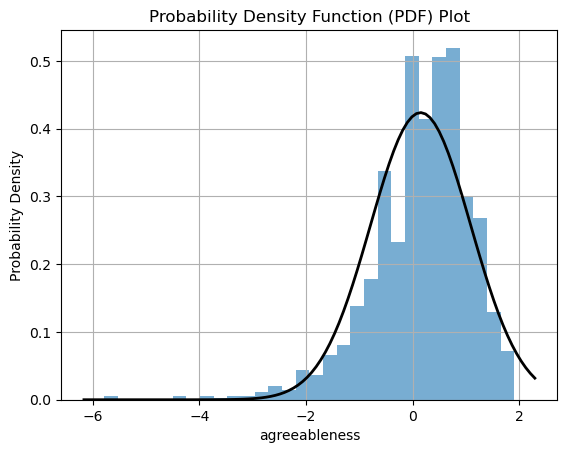

In [120]:
mu, sigma = norm.fit(df['agreeableness'])

# Plotting the histogram of the data with the probability density function (PDF) curve
plt.hist(df['agreeableness'], bins=30, density=True, alpha=0.6)  # Histogram
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)  # PDF curve

plt.title('Probability Density Function (PDF) Plot')
plt.xlabel('agreeableness')
plt.ylabel('Probability Density')
plt.grid(True)

# Show plot
plt.show()

##### Observations

| **Plots** | **Inferences** |
|---|---|
| 1. Summary Plot | The variation in the distribution of marks score in agreeableness module seems linear from 25% -> Max range and exponential in min->25% range. |
| 2. KDE Plot | The  Kernel Density Estimation (KDE) plot does not have a bell shape, very pointed peak, presence of significant left skewness. |
| 3. Histogram | The data exhibits significant negative skewness, with a skewness value around -1.20 (approximately) as indicated by the data description. The measures of central tendency (mean, median) are quite close to each other because of presence of people not attempting the section, 0.146496 and 0.212400 respectively. |
| 4. Box Plot | The distribution of data is good but there is large presence of outliers below the lower quartile range. |
| 5. PDF | The Probability distribution function (PDF) reveals a large degree of -ve skewness in the data, +ve kurtosis because of pointed peak, low variability in the data as it is not very wide but the distribution is not a normal distribution. |

- ___Feature 'extraversion'___

<AxesSubplot:title={'center':'Summary Plot'}>

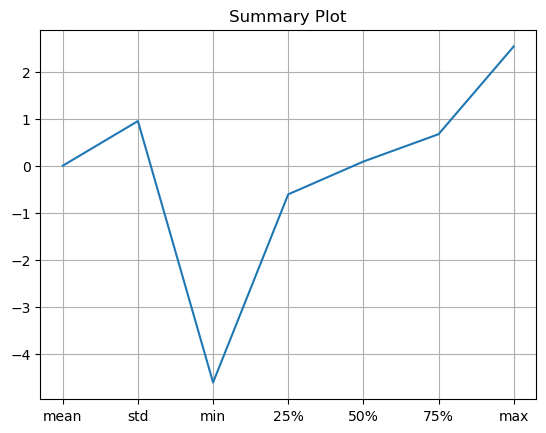

In [240]:
df['extraversion'].describe()[1:].plot(grid=True, title='Summary Plot')

<AxesSubplot:title={'center':'KDE plot for marks scored in extraversion section'}, ylabel='Density'>

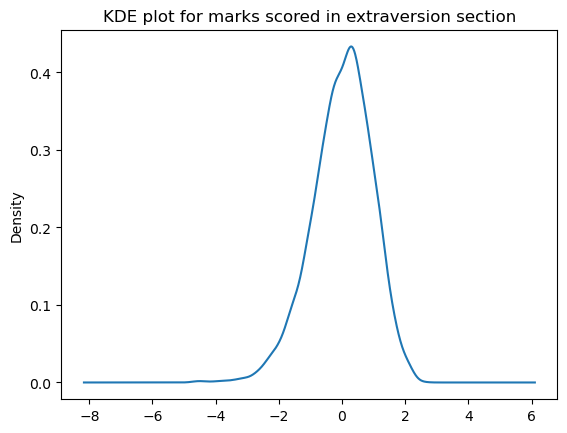

In [241]:
df['extraversion'].plot(kind='kde', title='KDE plot for marks scored in extraversion section')

<AxesSubplot:title={'center':'KDE plot for marks scored in extraversion section'}>

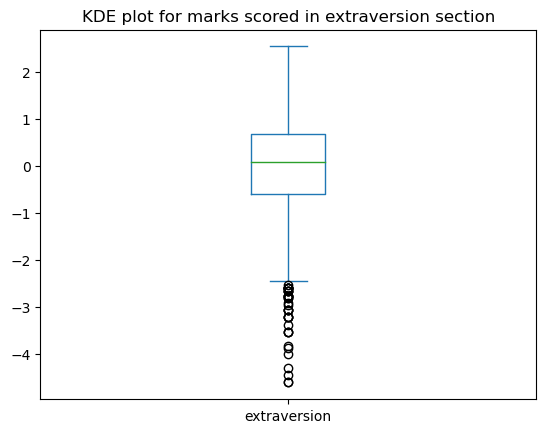

In [242]:
df['extraversion'].plot(kind='box', title='KDE plot for marks scored in extraversion section')

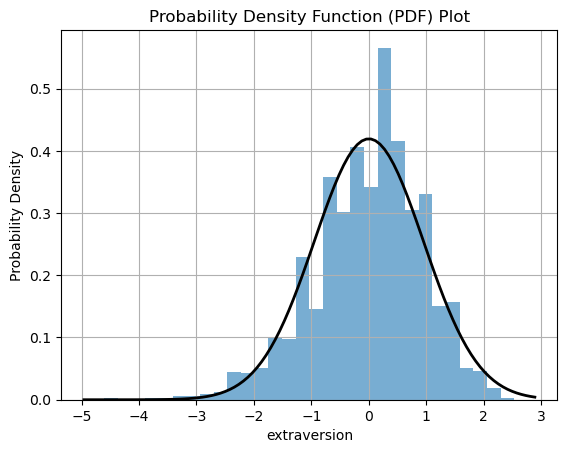

In [124]:
mu, sigma = norm.fit(df['extraversion'])

# Plotting the histogram of the data with the probability density function (PDF) curve
plt.hist(df['extraversion'], bins=30, density=True, alpha=0.6)  # Histogram
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)  # PDF curve

plt.title('Probability Density Function (PDF) Plot')
plt.xlabel('extraversion')
plt.ylabel('Probability Density')
plt.grid(True)

# Show plot
plt.show()

##### Observations

| **Plots** | **Inferences** |
|---|---|
| 1. Summary Plot | The variation in the distribution of marks score in extraversion module seems linear from 25% -> Max range and exponential in min->25% range. |
| 2. KDE Plot | The  Kernel Density Estimation (KDE) plot has a slight bell shape, very pointed peak, presence of significant left skewness. |
| 3. Histogram | The data exhibits slight negative skewness, with a skewness value around -0.52 (approximately) as indicated by the data description. The measures of central tendency (mean, median) are quite close to each other because of presence of people not attempting the section, 0.002763 and 0.091400 respectively. |
| 4. Box Plot | The distribution of data is good but there is large presence of outliers below the lower quartile range. |
| 5. PDF | The Probability distribution function (PDF) reveals a slight degree of -ve skewness in the data, +ve kurtosis because of pointed peak, low variability in the data as it is not very wide but the distribution is not a normal distribution. |

- ___Feature 'nueroticism'___

<AxesSubplot:title={'center':'Summary Plot'}>

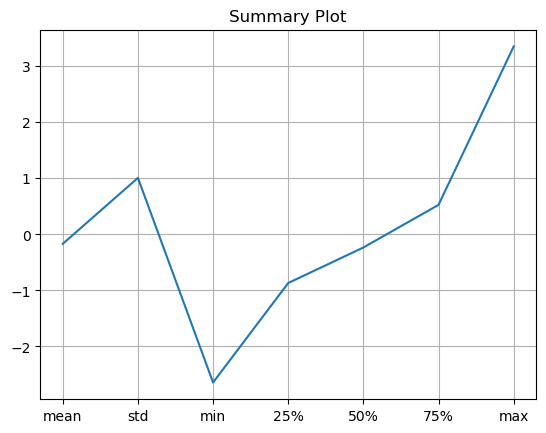

In [255]:
df['nueroticism'].describe()[1:].plot(grid=True, title='Summary Plot')

<AxesSubplot:title={'center':'KDE plot for marks in nueroticism section'}, ylabel='Density'>

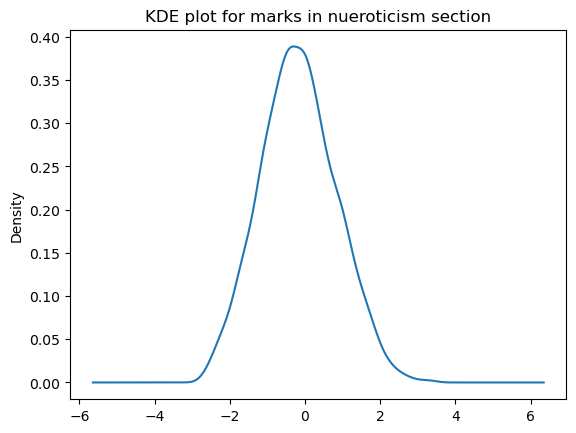

In [256]:
df['nueroticism'].plot(kind='kde', title='KDE plot for marks in nueroticism section')

<AxesSubplot:title={'center':'Box plot for marks in nueroticism section'}>

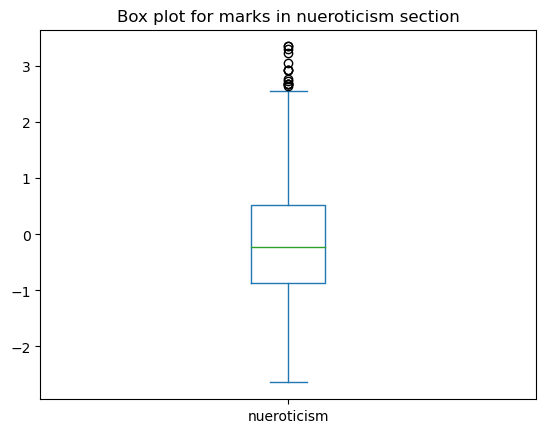

In [257]:
df['nueroticism'].plot(kind='box', title='Box plot for marks in nueroticism section')

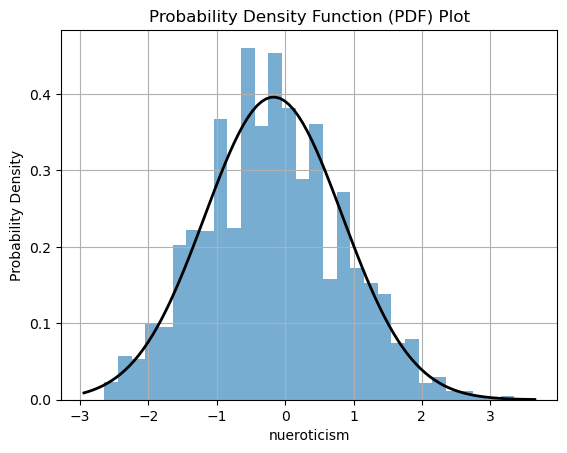

In [128]:
mu, sigma = norm.fit(df['nueroticism'])

# Plotting the histogram of the data with the probability density function (PDF) curve
plt.hist(df['nueroticism'], bins=30, density=True, alpha=0.6)  # Histogram
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)  # PDF curve

plt.title('Probability Density Function (PDF) Plot')
plt.xlabel('nueroticism')
plt.ylabel('Probability Density')
plt.grid(True)

# Show plot
plt.show()

##### Observations

| **Plots** | **Inferences** |
|---|---|
| 1. Summary Plot | The variation in the distribution of marks score in nueroticism module seems linear from 25% -> Max range and exponential in min->25% range. |
| 2. KDE Plot | The  Kernel Density Estimation (KDE) plot has a slight bell shape, very pointed peak, presence of very slight right skewness. |
| 3. Histogram | The data exhibits very slight positive skewness, with a skewness value around 0.16 (approximately) as indicated by the data description. The measures of central tendency (mean, median) are quite close to each other because of presence of people not attempting the section, -0.169033 and -0.234400 respectively. |
| 4. Box Plot | The distribution of data is good but there is large presence of outliers above the upper quartile range. |
| 5. PDF | The Probability distribution function (PDF) reveals a slight degree of +ve skewness in the data, -ve kurtosis because of slightly pointed peak, decent variability in the data as it is not very wide but the distribution is not a normal distribution. |

- ___Feature 'openess_to_experience'___

<AxesSubplot:title={'center':'Summary Plot'}>

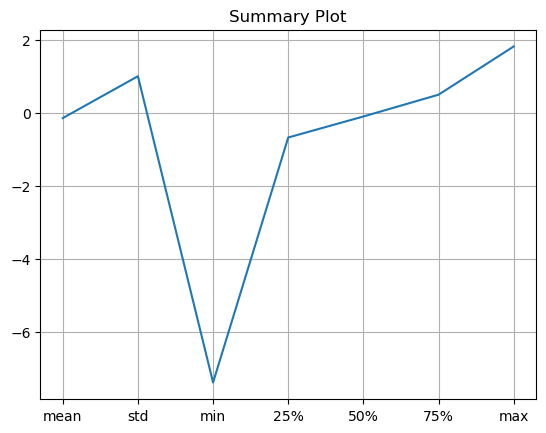

In [246]:
df['openess_to_experience'].describe()[1:].plot(grid=True, title='Summary Plot')

<AxesSubplot:title={'center':'KDE plot for Scores in openess_to_experience section of AMCAT’s personality test'}, ylabel='Density'>

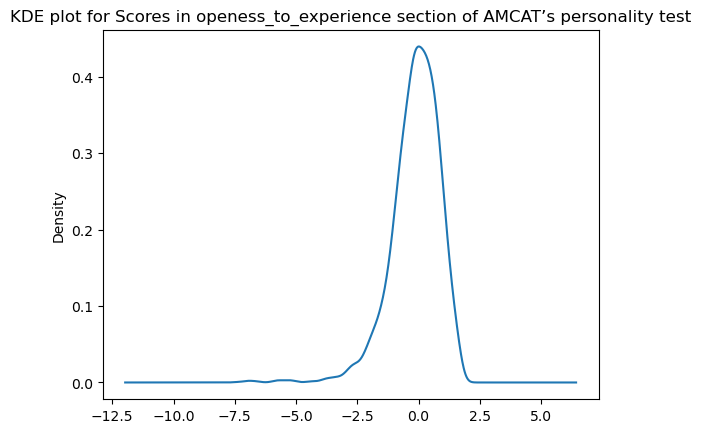

In [247]:
df['openess_to_experience'].plot(kind='kde', title='KDE plot for Scores in openess_to_experience section of AMCAT’s personality test')

<AxesSubplot:title={'center':'Box plot for Scores in openess_to_experience section of AMCAT’s personality test'}>

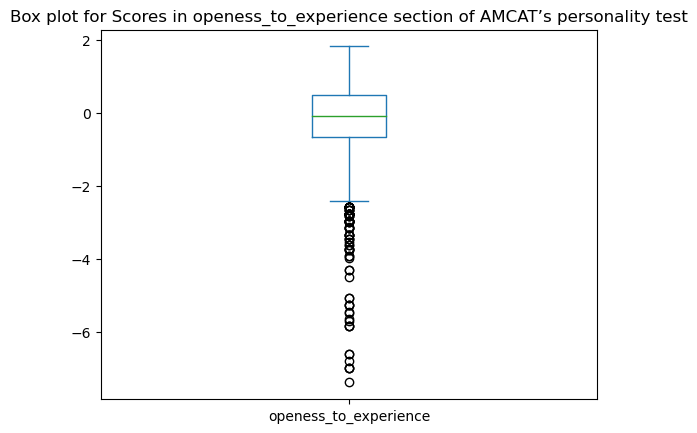

In [248]:
df['openess_to_experience'].plot(kind='box', title='Box plot for Scores in openess_to_experience section of AMCAT’s personality test')

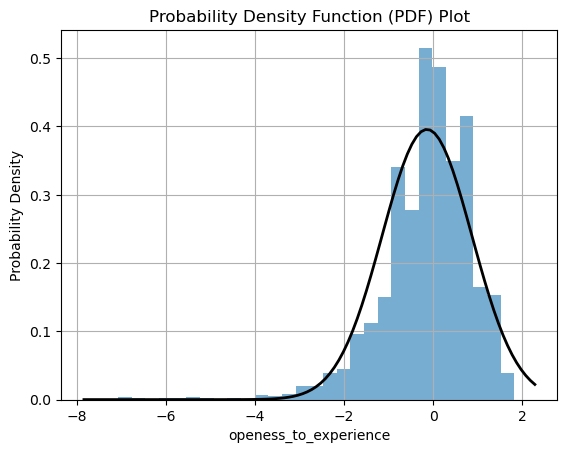

In [132]:
mu, sigma = norm.fit(df['openess_to_experience'])

# Plotting the histogram of the data with the probability density function (PDF) curve
plt.hist(df['openess_to_experience'], bins=30, density=True, alpha=0.6)  # Histogram
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)  # PDF curve

plt.title('Probability Density Function (PDF) Plot')
plt.xlabel('openess_to_experience')
plt.ylabel('Probability Density')
plt.grid(True)

# Show plot
plt.show()

##### Observations

| **Plots** | **Inferences** |
|---|---|
| 1. Summary Plot | The variation in the distribution of marks score in openess_to_experience module seems linear from 25% -> Max range and exponential in min->25% range. |
| 2. KDE Plot | The  Kernel Density Estimation (KDE) plot has a slight bell shape, very pointed peak, presence of significant left skewness. |
| 3. Histogram | The data exhibits slight negative skewness, with a skewness value around -1.50 (approximately) as indicated by the data description. The measures of central tendency (mean, median) are quite close to each other because of presence of people not attempting the section, -0.138110 and -0.094300 respectively. |
| 4. Box Plot | The distribution of data is good but there is large presence of outliers below the lower quartile range. |
| 5. PDF | The Probability distribution function (PDF) reveals a large degree of -ve skewness in the data, +ve kurtosis because of pointed peak, low variability in the data as it is not very wide but the distribution is not a normal distribution. |

- ___Feature 'Tenure'___

<AxesSubplot:title={'center':'Summary Plot'}>

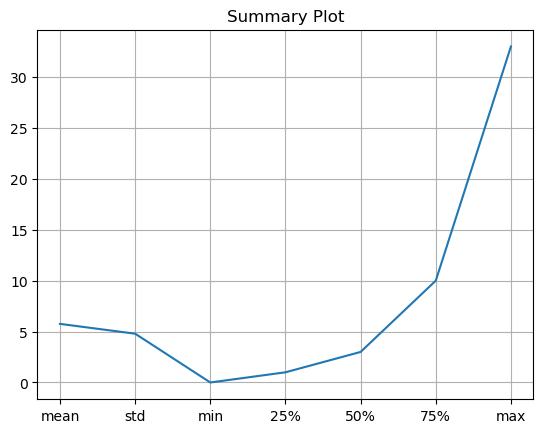

In [252]:
df['Tenure'].describe()[1:].plot(grid=True, title='Summary Plot')

<AxesSubplot:title={'center':'Histogram of Tenure of employees'}, ylabel='Frequency'>

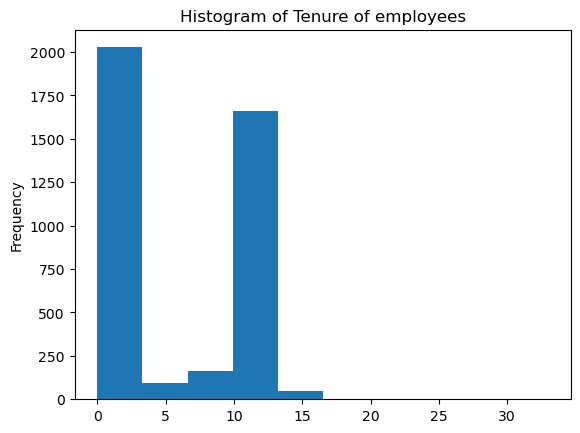

In [269]:
df['Tenure'].plot(kind='hist', title='Histogram of Tenure of employees')

<AxesSubplot:title={'center':'KDE plot of Tenure of employees'}, ylabel='Density'>

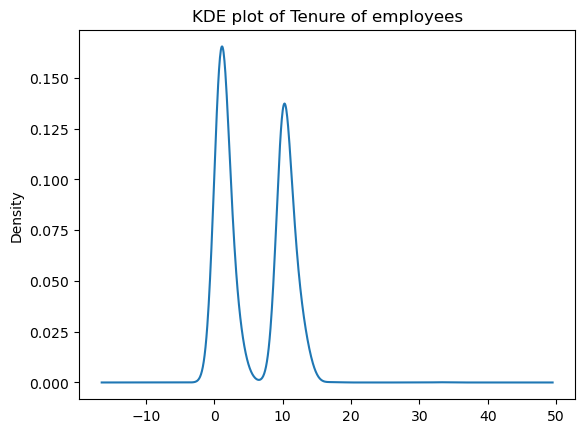

In [253]:
df['Tenure'].plot(kind='kde', title='KDE plot of Tenure of employees')

<AxesSubplot:title={'center':'Box plot of Tenure of employees'}>

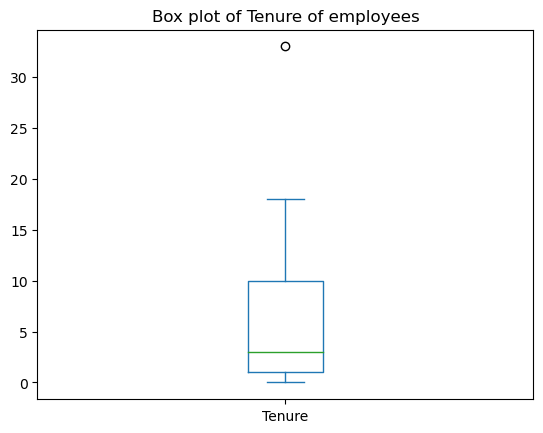

In [254]:
df['Tenure'].plot(kind='box', title='Box plot of Tenure of employees')

##### Observations

| **Plots** | **Inferences** |
|---|---|
| 1. Summary Plot | The variation in the distribution of Tenure of employees seems exponential throughout the range.|
| 2. KDE Plot | The  Kernel Density Estimation (KDE) plot does not have a bell shape, very pointed peaks, double peaks,  presence of large right skewness. |
| 3. Histogram | The data exhibits large positive skewness, with a skewness value around 0.18 (approximately) as indicated by the data description. The measures of central tendency (mean, median) are quite close to each other because of presence of people not attempting the section, 5.75 and 3 respectively. |
| 4. Box Plot | The distribution of data is good but there is presence of extreme outliers above the upper quartile range. |

- ___Feature 'Age'___

<AxesSubplot:title={'center':'Summary Plot'}>

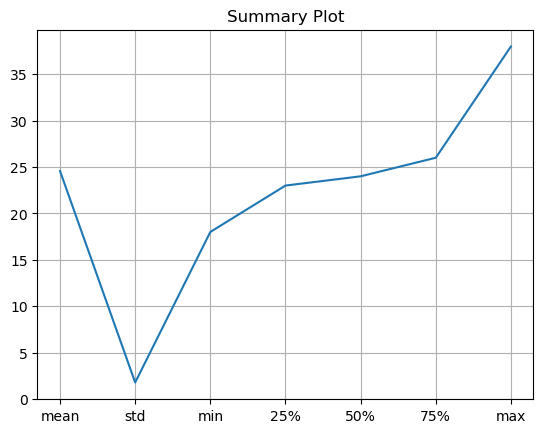

In [264]:
df['Age'].describe()[1:].plot(grid=True, title='Summary Plot')

<AxesSubplot:title={'center':'Histogram for Age'}, ylabel='Frequency'>

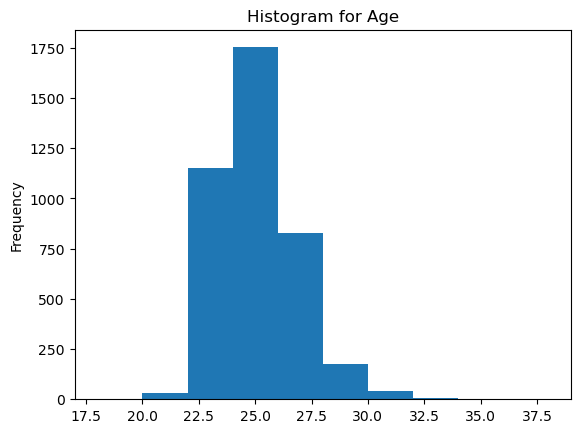

In [271]:
df['Age'].plot(kind='hist', title='Histogram for Age')

<AxesSubplot:title={'center':'KDE plot for age'}, ylabel='Density'>

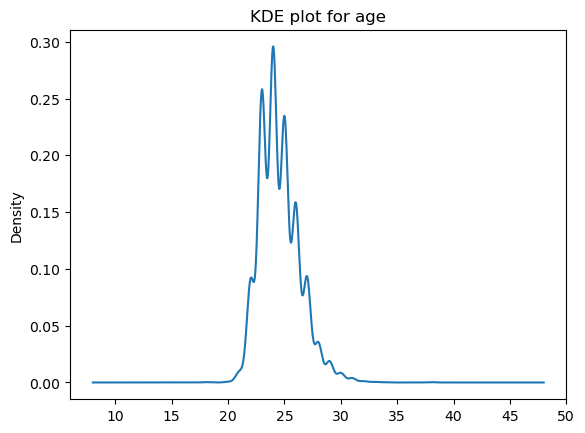

In [265]:
df['Age'].plot(kind='kde', title='KDE plot for age')

<AxesSubplot:title={'center':'Box plot for age'}>

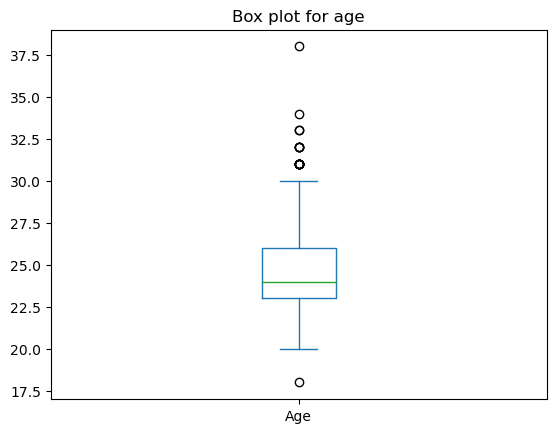

In [267]:
df['Age'].plot(kind='box', title='Box plot for age')

##### Observations

| **Plots** | **Inferences** |
|---|---|
| 1. Summary Plot | The variation in the distribution of Age seems exponential. |
| 2. Histogram | Most of the values are between 20 to 35 years.|
| 3. Box Plot | There are very small number of outliers in the data, very small number of them are below the lower IQR and majority of them are above the Upper Quartile Range with some extreme outliers as well. |
| 4. KDE Plot |  Kernel Density Estimation (KDE) reveals a +ve degree of skewness in the data, multiple peaks  i.e. the distribution is not a normal distribution pattern. This is proved further by calculating kurtosis which is equal to 1.82 .|


# Bivariate Analysis

### Salary for Gender

In [274]:
df.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Tenure', 'Age'],
      dtype='object')

<AxesSubplot:xlabel='Salary', ylabel='Gender'>

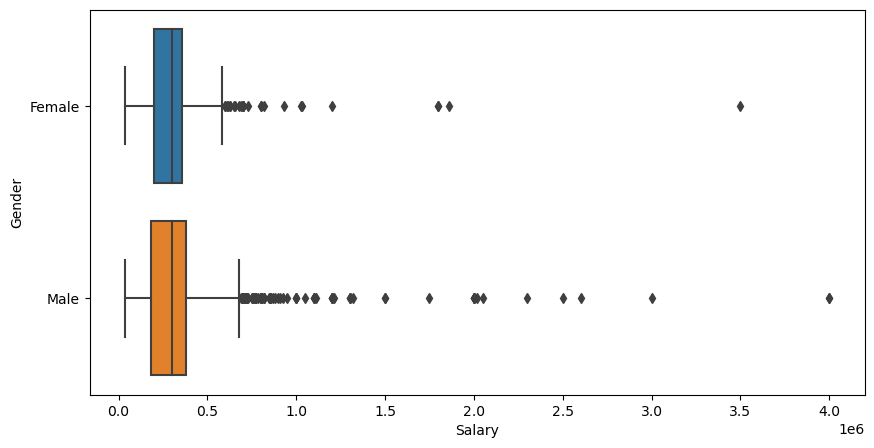

In [279]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Salary',y='Gender',data=df)

#### Observations
- It is noted that there are many outliers in the salary feature.
- There is not much difference between median salary for both genders.
- We can also observe male have more outliers, indicating there are more people getting higher pays in male than female category.

### Salary for each specialization

Text(0.5, 0.98, 'Salary levels for each specialization')

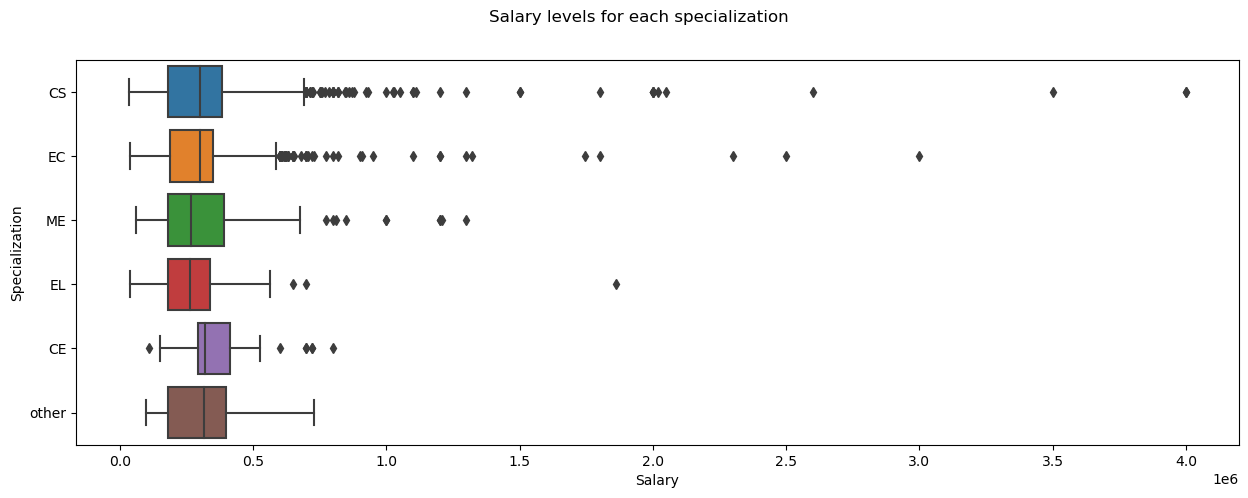

In [282]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Salary',y='Specialization',data=df)
plt.suptitle('Salary levels for each specialization')

#### Observations
- Median salary of people from all specializations are nearly similar.
- We can see there are more people getting higher pays who have specialization in CS/EC compared to others.

### Salary vs Designations

In [288]:
top = list(df.sort_values("Salary",ascending=False)["Designation"].unique())[:20]
most_pay = df[df['Designation'].isin(top)]

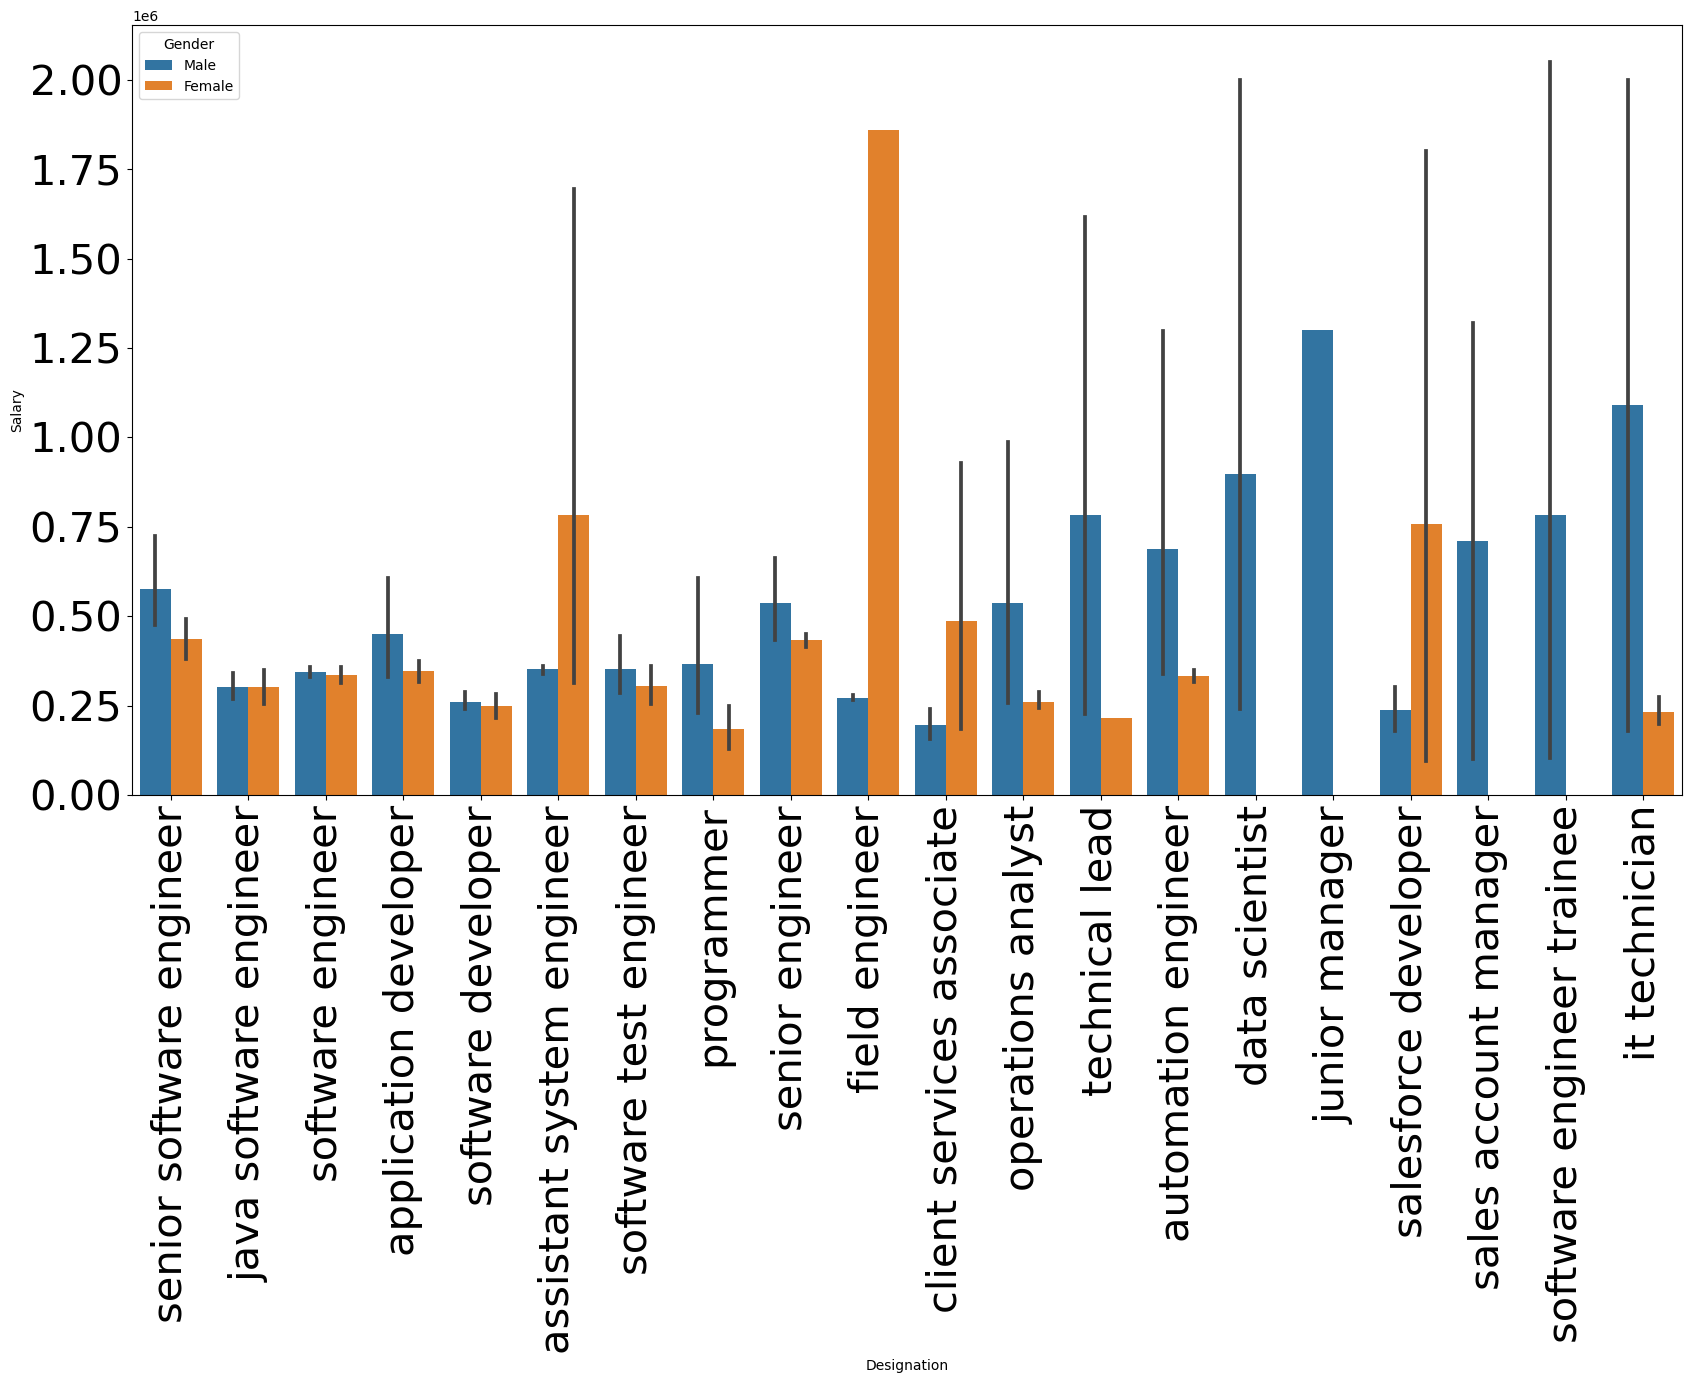

In [289]:
plt.figure(figsize=(20,10))
sns.barplot(x='Designation',y='Salary',hue='Gender',data=most_pay)
plt.xticks(fontsize=30,rotation=90)
plt.yticks(fontsize=30)
plt.show()

#### Observations
- Most of the high paying jobs are from IT domain.
- In 45% of top paying roles, males are generally paid higher as compared to females.
- In 20% of top paying roles, females are paid higher than males.
- In roles like junior manager,sales account manager, software engineer trainee there are no females working in these fields.
- Junior manager is highest paying for males and field engineer is the highest paying role for males.
- The disperancy between pay based on gender might be because of other features like experience, specialization etc.
- Software Enginner and Software developer are most frequent and highest paid jobs.

### Tenure vs Salary

<AxesSubplot:xlabel='Tenure', ylabel='Salary'>

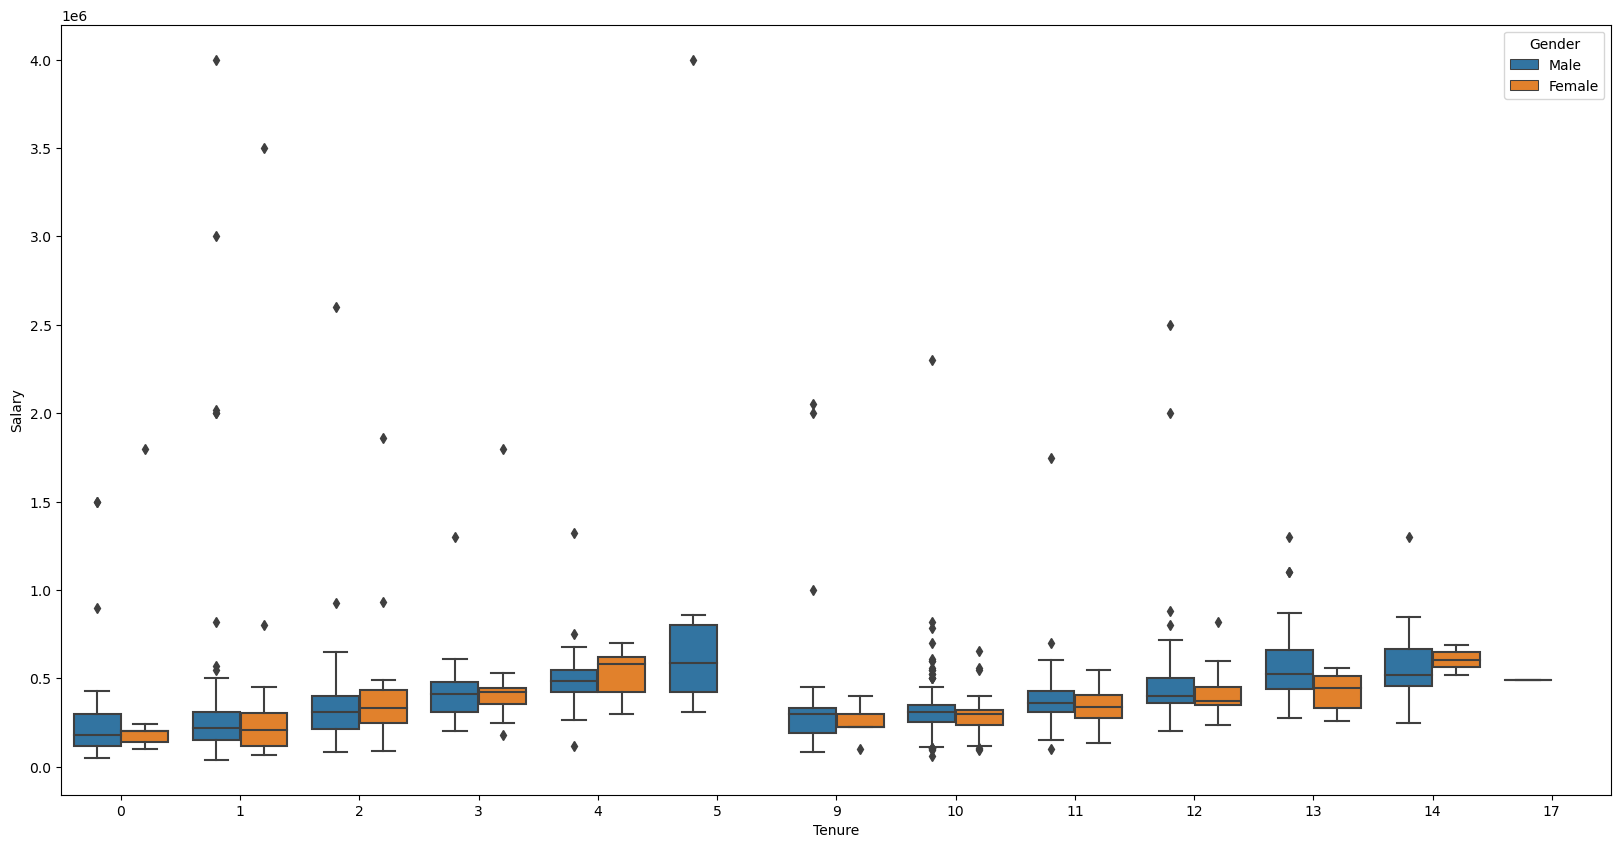

In [291]:
plt.figure(figsize=(20,10))
sns.boxplot(data=most_pay,x='Tenure',y='Salary',hue='Gender')

#### Observations
- Median salary of both males and females have increased slightly with experience for first five years and decreased suddenly on the 6th year and then same pattern for the following years.
- We can see that males and females having same experience are paid nearly equally around 3.5-5 lakhs.

# Research Questions

## Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

<AxesSubplot:xlabel='Designation', ylabel='Salary'>

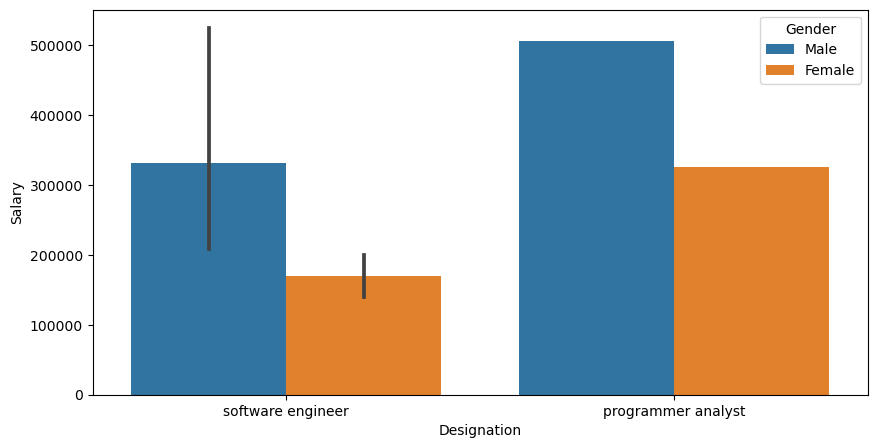

In [292]:
temp = df[(df["Designation"].isin(["programmer analyst","software engineer","hardware engineer","associate engineer"])) & (df["Tenure"]==0)]
plt.figure(figsize=(10,5))
sns.barplot(x="Designation",y="Salary",hue="Gender",data=temp)

#### Observations
- For Freshers, the salary is starting from 2 lakhh and males are earning more than females as a fresher.

### Applying One sample T-Test to verify the hypothesis

- Null Hypothesis: mean salary = 250,000
- Alternate Hypothesis : mean salary != 250,000

In [296]:
from scipy import stats as st
from scipy.stats import chi2_contingency as cst
pv = st.ttest_1samp(temp['Salary'],popmean=250000)[1]
### for a 95% confidence interval, p- value should be >0.05 to claim the null hypothesis
if pv < 0.05:
    print('We reject the null hypothesis and Average salary is not equal to 250,000')
else:
    print('We fail to reject null hypothesis and Average salary is equal to 250,000')

We fail to reject null hypothesis and Average salary is equal to 250,000


## Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

<AxesSubplot:xlabel='Specialization', ylabel='count'>

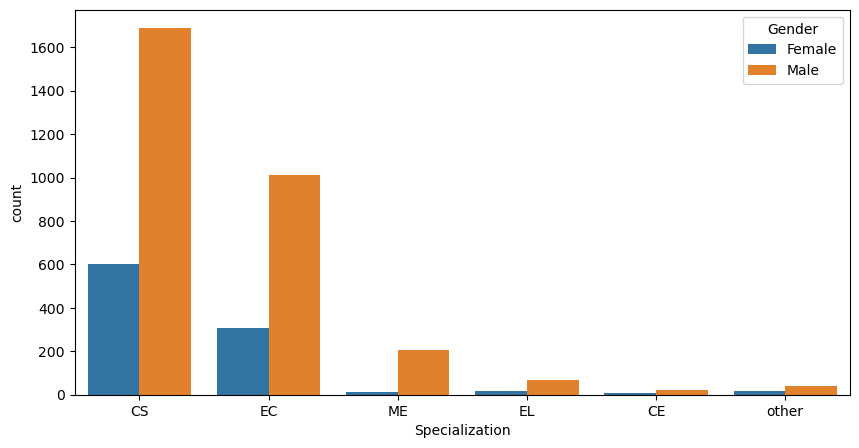

In [294]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Specialization',hue='Gender')

#### Observations
- Most of the people in the survey are from CS & EC specialization.

### Hypothesis Test
- Null Hypothesis: preference of Specialisation does not depend on the Gender
- Alternate Hypothesis : preference of Specialisation depend on the Gender

In [298]:
test = pd.crosstab(df['Gender'], df['Specialization'],margins=True)
pv = cst(test)[1]
if pv < 0.05:
    print('We reject the null hypothesis and preference of Specialisation depend on the Gender')
else:
    print('We fail to reject null hypothesis and preference of Specialisation does not depend on the Gender')

We reject the null hypothesis and preference of Specialisation depend on the Gender


### So the proposed hypothesis is true, and preference of Specialisation depend on the Gender

# Conclusion

- **Data Understanding:**

The dataset encompasses the employment outcomes of engineering graduates, focusing on target variable Salary.
Additionally, it includes standardized scores in three distinct areas: cognitive skills, technical skills, and personality skills.

- **Data Manipulation:**

Upon initial observation, the dataset consists of 4000 rows and 40 columns.
The dataset exhibits numerous duplicate values, necessitating data manipulation.
Initially, we remove redundant rows and columns.
Subsequently, we assess for the presence of any missing values (NaN).
Following data cleaning, we proceed with visualization.

- **Univariate Analysis:**

Univariate analysis encompasses various plots, including Probability Distribution Functions (PDF), Histograms, Box Plots, and Summary Plots.
These visualizations illustrate probability and frequency distributions.

- **Bivariate Analysis:**

Bivariate analysis comprises Barplots, Crosstabs etc.
This analysis helps in comparing percentages across different variables.
Additionally, it aids in identifying outliers, as observed through Boxplots.